In [15]:
# 1.1 기존의 프로그램 방식

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
def celsius_to_fahrenheit(x):
    return x * 1.8+32

In [25]:
input_c=int(input('섭씨온도는?'))
print("화씨온도는 ",celsius_to_fahrenheit(input_c))

섭씨온도는?1
화씨온도는  33.8


## 1.2 머신러닝 프로그램방식
- 1. 데이터 확보 및 생성
- 2. 데이터 전처리 : 훈련 데이터셋, 검증데이터셋, 시험데이터셋
- 3. 모델 구성
- 4. 모델 학습 과정 
- 5. 모델 학습 시키기
- 6. 모델 평가(시험데이터 셋으로)
- 7. 모델 사용(입력값을 주어서 에측값을 받기)

In [20]:
# 182. 데이터
data_C=np.array(range(100))
data_C # 입력값

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [26]:
data_F= celsius_to_fahrenheit(data_C)
data_F #target값

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [27]:
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense # 입력값과 출력값

In [30]:
# 3. 모델 구성
model = Sequential()
model.add(Dense(1,input_dim=1)) 
#input dim=1 독립변수 1개, target데이터 1개nput dim=1 독립변수 1개, target데이터 1개

# 4. 모델 학습과정 설정
model.compile(loss='mse',optimizer="rmsprop",metrics=['mae'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
# 학습 전 에측
print(model.predict([3]))

[[0.05121946]]


In [34]:
model.save('model/before_learning.h5')

In [36]:
# 2. 컴퓨터에게 학습시키기 위해 optimize함 (전체의 편차 줄이기. 이상적인 편차 0~1)
scaled_data_C=data_C/100.0
scaled_data_F=data_F/100.0
print(scaled_data_C,end="\n\n")
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]

[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76

In [37]:
# 4. 모델 학습시키기
hist = model.fit(scaled_data_C,scaled_data_F,epochs=1000,verbose=2) #매개변수, 종속변수.
#넘파이 배열을 넣을 것.
#epochs값만큼 실행
#verbose는 로스를 출력함


Epoch 1/1000
4/4 - 1s - loss: 1.6998 - mae: 1.1981
Epoch 2/1000
4/4 - 0s - loss: 1.6698 - mae: 1.1865
Epoch 3/1000
4/4 - 0s - loss: 1.6494 - mae: 1.1786
Epoch 4/1000
4/4 - 0s - loss: 1.6332 - mae: 1.1721
Epoch 5/1000
4/4 - 0s - loss: 1.6176 - mae: 1.1662
Epoch 6/1000
4/4 - 0s - loss: 1.6017 - mae: 1.1598
Epoch 7/1000
4/4 - 0s - loss: 1.5863 - mae: 1.1536
Epoch 8/1000
4/4 - 0s - loss: 1.5715 - mae: 1.1476
Epoch 9/1000
4/4 - 0s - loss: 1.5572 - mae: 1.1419
Epoch 10/1000
4/4 - 0s - loss: 1.5436 - mae: 1.1364
Epoch 11/1000
4/4 - 0s - loss: 1.5290 - mae: 1.1303
Epoch 12/1000
4/4 - 0s - loss: 1.5144 - mae: 1.1245
Epoch 13/1000
4/4 - 0s - loss: 1.4998 - mae: 1.1185
Epoch 14/1000
4/4 - 0s - loss: 1.4859 - mae: 1.1127
Epoch 15/1000
4/4 - 0s - loss: 1.4727 - mae: 1.1073
Epoch 16/1000
4/4 - 0s - loss: 1.4577 - mae: 1.1010
Epoch 17/1000
4/4 - 0s - loss: 1.4425 - mae: 1.0947
Epoch 18/1000
4/4 - 0s - loss: 1.4286 - mae: 1.0889
Epoch 19/1000
4/4 - 0s - loss: 1.4142 - mae: 1.0827
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 0.1956 - mae: 0.3623
Epoch 159/1000
4/4 - 0s - loss: 0.1919 - mae: 0.3590
Epoch 160/1000
4/4 - 0s - loss: 0.1878 - mae: 0.3555
Epoch 161/1000
4/4 - 0s - loss: 0.1842 - mae: 0.3521
Epoch 162/1000
4/4 - 0s - loss: 0.1807 - mae: 0.3490
Epoch 163/1000
4/4 - 0s - loss: 0.1776 - mae: 0.3462
Epoch 164/1000
4/4 - 0s - loss: 0.1735 - mae: 0.3426
Epoch 165/1000
4/4 - 0s - loss: 0.1707 - mae: 0.3400
Epoch 166/1000
4/4 - 0s - loss: 0.1675 - mae: 0.3372
Epoch 167/1000
4/4 - 0s - loss: 0.1651 - mae: 0.3350
Epoch 168/1000
4/4 - 0s - loss: 0.1616 - mae: 0.3317
Epoch 169/1000
4/4 - 0s - loss: 0.1580 - mae: 0.3282
Epoch 170/1000
4/4 - 0s - loss: 0.1545 - mae: 0.3250
Epoch 171/1000
4/4 - 0s - loss: 0.1514 - mae: 0.3221
Epoch 172/1000
4/4 - 0s - loss: 0.1492 - mae: 0.3201
Epoch 173/1000
4/4 - 0s - loss: 0.1466 - mae: 0.3174
Epoch 174/1000
4/4 - 0s - loss: 0.1434 - mae: 0.3145
Epoch 175/1000
4/4 - 0s - loss: 0.1412 - mae: 0.3123
Epoch 176/1000
4/4 - 0s - loss: 0.1387 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.0343 - mae: 0.1599
Epoch 314/1000
4/4 - 0s - loss: 0.0339 - mae: 0.1590
Epoch 315/1000
4/4 - 0s - loss: 0.0335 - mae: 0.1582
Epoch 316/1000
4/4 - 0s - loss: 0.0332 - mae: 0.1575
Epoch 317/1000
4/4 - 0s - loss: 0.0329 - mae: 0.1565
Epoch 318/1000
4/4 - 0s - loss: 0.0326 - mae: 0.1559
Epoch 319/1000
4/4 - 0s - loss: 0.0322 - mae: 0.1552
Epoch 320/1000
4/4 - 0s - loss: 0.0319 - mae: 0.1544
Epoch 321/1000
4/4 - 0s - loss: 0.0316 - mae: 0.1535
Epoch 322/1000
4/4 - 0s - loss: 0.0312 - mae: 0.1526
Epoch 323/1000
4/4 - 0s - loss: 0.0309 - mae: 0.1519
Epoch 324/1000
4/4 - 0s - loss: 0.0306 - mae: 0.1512
Epoch 325/1000
4/4 - 0s - loss: 0.0303 - mae: 0.1503
Epoch 326/1000
4/4 - 0s - loss: 0.0300 - mae: 0.1497
Epoch 327/1000
4/4 - 0s - loss: 0.0297 - mae: 0.1489
Epoch 328/1000
4/4 - 0s - loss: 0.0293 - mae: 0.1479
Epoch 329/1000
4/4 - 0s - loss: 0.0290 - mae: 0.1471
Epoch 330/1000
4/4 - 0s - loss: 0.0287 - mae: 0.1463
Epoch 331/1000
4/4 - 0s - loss: 0.0284 - mae: 

Epoch 468/1000
4/4 - 0s - loss: 0.0015 - mae: 0.0339
Epoch 469/1000
4/4 - 0s - loss: 0.0015 - mae: 0.0330
Epoch 470/1000
4/4 - 0s - loss: 0.0014 - mae: 0.0324
Epoch 471/1000
4/4 - 0s - loss: 0.0014 - mae: 0.0317
Epoch 472/1000
4/4 - 0s - loss: 0.0013 - mae: 0.0310
Epoch 473/1000
4/4 - 0s - loss: 0.0012 - mae: 0.0302
Epoch 474/1000
4/4 - 0s - loss: 0.0012 - mae: 0.0295
Epoch 475/1000
4/4 - 0s - loss: 0.0011 - mae: 0.0287
Epoch 476/1000
4/4 - 0s - loss: 0.0010 - mae: 0.0279
Epoch 477/1000
4/4 - 0s - loss: 9.9528e-04 - mae: 0.0272
Epoch 478/1000
4/4 - 0s - loss: 9.1914e-04 - mae: 0.0262
Epoch 479/1000
4/4 - 0s - loss: 8.6295e-04 - mae: 0.0253
Epoch 480/1000
4/4 - 0s - loss: 8.1094e-04 - mae: 0.0246
Epoch 481/1000
4/4 - 0s - loss: 7.5816e-04 - mae: 0.0238
Epoch 482/1000
4/4 - 0s - loss: 7.0626e-04 - mae: 0.0229
Epoch 483/1000
4/4 - 0s - loss: 6.5148e-04 - mae: 0.0220
Epoch 484/1000
4/4 - 0s - loss: 6.1446e-04 - mae: 0.0215
Epoch 485/1000
4/4 - 0s - loss: 5.7243e-04 - mae: 0.0207
Epoch 486/

Epoch 607/1000
4/4 - 0s - loss: 1.0934e-07 - mae: 3.0817e-04
Epoch 608/1000
4/4 - 0s - loss: 1.2804e-07 - mae: 3.4231e-04
Epoch 609/1000
4/4 - 0s - loss: 3.7523e-07 - mae: 5.5411e-04
Epoch 610/1000
4/4 - 0s - loss: 1.4266e-06 - mae: 0.0012
Epoch 611/1000
4/4 - 0s - loss: 1.9525e-07 - mae: 4.2961e-04
Epoch 612/1000
4/4 - 0s - loss: 5.5795e-07 - mae: 7.3072e-04
Epoch 613/1000
4/4 - 0s - loss: 3.0523e-07 - mae: 5.2545e-04
Epoch 614/1000
4/4 - 0s - loss: 8.6319e-07 - mae: 9.1126e-04
Epoch 615/1000
4/4 - 0s - loss: 3.2571e-07 - mae: 5.5543e-04
Epoch 616/1000
4/4 - 0s - loss: 9.2934e-07 - mae: 9.4572e-04
Epoch 617/1000
4/4 - 0s - loss: 7.3054e-07 - mae: 8.1161e-04
Epoch 618/1000
4/4 - 0s - loss: 2.9633e-07 - mae: 5.3212e-04
Epoch 619/1000
4/4 - 0s - loss: 6.4232e-07 - mae: 7.8392e-04
Epoch 620/1000
4/4 - 0s - loss: 8.4748e-07 - mae: 8.9425e-04
Epoch 621/1000
4/4 - 0s - loss: 3.9220e-07 - mae: 6.1350e-04
Epoch 622/1000
4/4 - 0s - loss: 5.2384e-07 - mae: 7.0901e-04
Epoch 623/1000
4/4 - 0s - lo

Epoch 743/1000
4/4 - 0s - loss: 4.7046e-07 - mae: 6.6798e-04
Epoch 744/1000
4/4 - 0s - loss: 9.7100e-07 - mae: 9.6427e-04
Epoch 745/1000
4/4 - 0s - loss: 8.4205e-07 - mae: 8.8630e-04
Epoch 746/1000
4/4 - 0s - loss: 7.2970e-09 - mae: 7.8579e-05
Epoch 747/1000
4/4 - 0s - loss: 8.2011e-08 - mae: 2.6384e-04
Epoch 748/1000
4/4 - 0s - loss: 1.4946e-06 - mae: 0.0012
Epoch 749/1000
4/4 - 0s - loss: 6.8731e-07 - mae: 7.6529e-04
Epoch 750/1000
4/4 - 0s - loss: 1.3831e-07 - mae: 3.6512e-04
Epoch 751/1000
4/4 - 0s - loss: 3.2260e-07 - mae: 5.4569e-04
Epoch 752/1000
4/4 - 0s - loss: 8.2507e-07 - mae: 8.8304e-04
Epoch 753/1000
4/4 - 0s - loss: 6.8014e-07 - mae: 8.0695e-04
Epoch 754/1000
4/4 - 0s - loss: 4.2865e-07 - mae: 6.4090e-04
Epoch 755/1000
4/4 - 0s - loss: 4.8722e-07 - mae: 6.8086e-04
Epoch 756/1000
4/4 - 0s - loss: 9.2395e-07 - mae: 9.3888e-04
Epoch 757/1000
4/4 - 0s - loss: 4.9238e-07 - mae: 6.8160e-04
Epoch 758/1000
4/4 - 0s - loss: 6.0535e-07 - mae: 7.5543e-04
Epoch 759/1000
4/4 - 0s - lo

Epoch 879/1000
4/4 - 0s - loss: 7.3493e-08 - mae: 2.5657e-04
Epoch 880/1000
4/4 - 0s - loss: 1.3457e-06 - mae: 0.0011
Epoch 881/1000
4/4 - 0s - loss: 4.2632e-07 - mae: 6.3778e-04
Epoch 882/1000
4/4 - 0s - loss: 1.6623e-07 - mae: 3.9856e-04
Epoch 883/1000
4/4 - 0s - loss: 2.9925e-07 - mae: 5.1354e-04
Epoch 884/1000
4/4 - 0s - loss: 1.1719e-06 - mae: 0.0011
Epoch 885/1000
4/4 - 0s - loss: 2.5160e-07 - mae: 4.8722e-04
Epoch 886/1000
4/4 - 0s - loss: 4.3464e-07 - mae: 6.3717e-04
Epoch 887/1000
4/4 - 0s - loss: 1.1896e-06 - mae: 0.0011
Epoch 888/1000
4/4 - 0s - loss: 3.7422e-07 - mae: 5.8869e-04
Epoch 889/1000
4/4 - 0s - loss: 4.5645e-07 - mae: 6.5168e-04
Epoch 890/1000
4/4 - 0s - loss: 8.6375e-07 - mae: 9.0302e-04
Epoch 891/1000
4/4 - 0s - loss: 5.7718e-07 - mae: 7.3452e-04
Epoch 892/1000
4/4 - 0s - loss: 3.0982e-07 - mae: 5.4607e-04
Epoch 893/1000
4/4 - 0s - loss: 7.9993e-07 - mae: 8.7326e-04
Epoch 894/1000
4/4 - 0s - loss: 5.2834e-07 - mae: 7.0727e-04
Epoch 895/1000
4/4 - 0s - loss: 5.52

In [42]:
hist = model.fit(scaled_data_C,scaled_data_F,epochs=10000,verbose=2)

Epoch 1/10000
4/4 - 0s - loss: 2.9249e-07 - mae: 5.1502e-04
Epoch 2/10000
4/4 - 0s - loss: 1.1609e-06 - mae: 0.0011
Epoch 3/10000
4/4 - 0s - loss: 5.5412e-07 - mae: 7.1849e-04
Epoch 4/10000
4/4 - 0s - loss: 3.1477e-07 - mae: 5.5024e-04
Epoch 5/10000
4/4 - 0s - loss: 2.1620e-07 - mae: 4.5071e-04
Epoch 6/10000
4/4 - 0s - loss: 1.3249e-06 - mae: 0.0011
Epoch 7/10000
4/4 - 0s - loss: 3.1909e-07 - mae: 5.5078e-04
Epoch 8/10000
4/4 - 0s - loss: 3.3487e-07 - mae: 5.6732e-04
Epoch 9/10000
4/4 - 0s - loss: 4.9990e-07 - mae: 6.8634e-04
Epoch 10/10000
4/4 - 0s - loss: 1.2403e-06 - mae: 0.0011
Epoch 11/10000
4/4 - 0s - loss: 4.4679e-07 - mae: 6.4853e-04
Epoch 12/10000
4/4 - 0s - loss: 1.9956e-07 - mae: 4.3480e-04
Epoch 13/10000
4/4 - 0s - loss: 4.3312e-07 - mae: 6.3607e-04
Epoch 14/10000
4/4 - 0s - loss: 1.1486e-06 - mae: 0.0010
Epoch 15/10000
4/4 - 0s - loss: 7.3437e-07 - mae: 7.9494e-04
Epoch 16/10000
4/4 - 0s - loss: 3.0889e-07 - mae: 5.3672e-04
Epoch 17/10000
4/4 - 0s - loss: 3.4754e-07 - mae:

Epoch 136/10000
4/4 - 0s - loss: 7.3880e-07 - mae: 8.3498e-04
Epoch 137/10000
4/4 - 0s - loss: 1.1440e-06 - mae: 0.0010
Epoch 138/10000
4/4 - 0s - loss: 4.9001e-08 - mae: 2.1642e-04
Epoch 139/10000
4/4 - 0s - loss: 3.8040e-08 - mae: 1.8239e-04
Epoch 140/10000
4/4 - 0s - loss: 7.9161e-07 - mae: 8.1534e-04
Epoch 141/10000
4/4 - 0s - loss: 1.5378e-06 - mae: 0.0010
Epoch 142/10000
4/4 - 0s - loss: 6.7155e-09 - mae: 7.4670e-05
Epoch 143/10000
4/4 - 0s - loss: 1.7331e-09 - mae: 3.7878e-05
Epoch 144/10000
4/4 - 0s - loss: 1.9542e-08 - mae: 1.2429e-04
Epoch 145/10000
4/4 - 0s - loss: 1.2929e-06 - mae: 0.0010
Epoch 146/10000
4/4 - 0s - loss: 1.1718e-07 - mae: 3.1588e-04
Epoch 147/10000
4/4 - 0s - loss: 7.0681e-07 - mae: 8.0686e-04
Epoch 148/10000
4/4 - 0s - loss: 8.8128e-07 - mae: 9.1775e-04
Epoch 149/10000
4/4 - 0s - loss: 4.8078e-07 - mae: 6.7528e-04
Epoch 150/10000
4/4 - 0s - loss: 7.1270e-07 - mae: 8.2450e-04
Epoch 151/10000
4/4 - 0s - loss: 3.5286e-07 - mae: 5.7908e-04
Epoch 152/10000
4/4 

Epoch 270/10000
4/4 - 0s - loss: 9.6063e-07 - mae: 9.5550e-04
Epoch 271/10000
4/4 - 0s - loss: 2.8628e-07 - mae: 5.2527e-04
Epoch 272/10000
4/4 - 0s - loss: 2.1751e-07 - mae: 4.4767e-04
Epoch 273/10000
4/4 - 0s - loss: 1.4865e-06 - mae: 0.0012
Epoch 274/10000
4/4 - 0s - loss: 3.6002e-07 - mae: 5.8372e-04
Epoch 275/10000
4/4 - 0s - loss: 1.3952e-07 - mae: 3.6671e-04
Epoch 276/10000
4/4 - 0s - loss: 4.9774e-07 - mae: 6.6835e-04
Epoch 277/10000
4/4 - 0s - loss: 1.0913e-06 - mae: 0.0010
Epoch 278/10000
4/4 - 0s - loss: 4.3960e-07 - mae: 6.4385e-04
Epoch 279/10000
4/4 - 0s - loss: 2.2902e-07 - mae: 4.6734e-04
Epoch 280/10000
4/4 - 0s - loss: 3.7601e-07 - mae: 5.9079e-04
Epoch 281/10000
4/4 - 0s - loss: 1.5911e-06 - mae: 0.0012
Epoch 282/10000
4/4 - 0s - loss: 1.0494e-07 - mae: 3.1775e-04
Epoch 283/10000
4/4 - 0s - loss: 1.3251e-07 - mae: 3.5175e-04
Epoch 284/10000
4/4 - 0s - loss: 1.3529e-06 - mae: 0.0011
Epoch 285/10000
4/4 - 0s - loss: 4.1519e-07 - mae: 6.2286e-04
Epoch 286/10000
4/4 - 0s

Epoch 404/10000
4/4 - 0s - loss: 2.4681e-07 - mae: 4.8536e-04
Epoch 405/10000
4/4 - 0s - loss: 2.5431e-07 - mae: 4.8898e-04
Epoch 406/10000
4/4 - 0s - loss: 1.1740e-06 - mae: 0.0011
Epoch 407/10000
4/4 - 0s - loss: 2.2516e-07 - mae: 4.6441e-04
Epoch 408/10000
4/4 - 0s - loss: 8.9500e-08 - mae: 2.8345e-04
Epoch 409/10000
4/4 - 0s - loss: 1.2437e-06 - mae: 0.0011
Epoch 410/10000
4/4 - 0s - loss: 1.2223e-06 - mae: 9.7315e-04
Epoch 411/10000
4/4 - 0s - loss: 2.3670e-08 - mae: 1.4887e-04
Epoch 412/10000
4/4 - 0s - loss: 8.7998e-09 - mae: 8.9844e-05
Epoch 413/10000
4/4 - 0s - loss: 1.9318e-07 - mae: 3.8278e-04
Epoch 414/10000
4/4 - 0s - loss: 2.1738e-06 - mae: 0.0014
Epoch 415/10000
4/4 - 0s - loss: 6.4432e-08 - mae: 2.3299e-04
Epoch 416/10000
4/4 - 0s - loss: 7.0749e-08 - mae: 2.5181e-04
Epoch 417/10000
4/4 - 0s - loss: 1.1493e-06 - mae: 0.0010
Epoch 418/10000
4/4 - 0s - loss: 3.0001e-07 - mae: 5.3878e-04
Epoch 419/10000
4/4 - 0s - loss: 7.6838e-07 - mae: 8.5434e-04
Epoch 420/10000
4/4 - 0s

Epoch 538/10000
4/4 - 0s - loss: 2.7865e-07 - mae: 5.1773e-04
Epoch 539/10000
4/4 - 0s - loss: 3.7545e-07 - mae: 5.9757e-04
Epoch 540/10000
4/4 - 0s - loss: 1.2904e-06 - mae: 0.0011
Epoch 541/10000
4/4 - 0s - loss: 2.5572e-07 - mae: 4.8568e-04
Epoch 542/10000
4/4 - 0s - loss: 2.4127e-07 - mae: 4.7712e-04
Epoch 543/10000
4/4 - 0s - loss: 5.3922e-07 - mae: 7.1131e-04
Epoch 544/10000
4/4 - 0s - loss: 1.5660e-06 - mae: 0.0011
Epoch 545/10000
4/4 - 0s - loss: 1.2451e-08 - mae: 1.0882e-04
Epoch 546/10000
4/4 - 0s - loss: 7.1018e-09 - mae: 8.1948e-05
Epoch 547/10000
4/4 - 0s - loss: 2.9330e-08 - mae: 1.4583e-04
Epoch 548/10000
4/4 - 0s - loss: 2.0156e-06 - mae: 0.0014
Epoch 549/10000
4/4 - 0s - loss: 3.3266e-07 - mae: 5.1168e-04
Epoch 550/10000
4/4 - 0s - loss: 2.6508e-08 - mae: 1.5892e-04
Epoch 551/10000
4/4 - 0s - loss: 6.2664e-08 - mae: 2.3462e-04
Epoch 552/10000
4/4 - 0s - loss: 1.0373e-06 - mae: 9.5888e-04
Epoch 553/10000
4/4 - 0s - loss: 1.2074e-06 - mae: 9.8240e-04
Epoch 554/10000
4/4 

Epoch 672/10000
4/4 - 0s - loss: 7.4486e-08 - mae: 2.5972e-04
Epoch 673/10000
4/4 - 0s - loss: 1.2867e-06 - mae: 0.0011
Epoch 674/10000
4/4 - 0s - loss: 4.9209e-07 - mae: 6.4901e-04
Epoch 675/10000
4/4 - 0s - loss: 4.7511e-07 - mae: 6.7069e-04
Epoch 676/10000
4/4 - 0s - loss: 7.2745e-07 - mae: 8.3357e-04
Epoch 677/10000
4/4 - 0s - loss: 3.8214e-07 - mae: 6.0231e-04
Epoch 678/10000
4/4 - 0s - loss: 1.6259e-07 - mae: 3.8654e-04
Epoch 679/10000
4/4 - 0s - loss: 1.1616e-06 - mae: 0.0010
Epoch 680/10000
4/4 - 0s - loss: 1.0747e-06 - mae: 9.6119e-04
Epoch 681/10000
4/4 - 0s - loss: 6.2526e-08 - mae: 2.3908e-04
Epoch 682/10000
4/4 - 0s - loss: 3.7833e-08 - mae: 1.8449e-04
Epoch 683/10000
4/4 - 0s - loss: 9.4827e-07 - mae: 9.2984e-04
Epoch 684/10000
4/4 - 0s - loss: 1.3446e-07 - mae: 3.2331e-04
Epoch 685/10000
4/4 - 0s - loss: 7.9998e-07 - mae: 8.3817e-04
Epoch 686/10000
4/4 - 0s - loss: 1.0924e-06 - mae: 9.8907e-04
Epoch 687/10000
4/4 - 0s - loss: 2.4660e-08 - mae: 1.4308e-04
Epoch 688/10000


Epoch 806/10000
4/4 - 0s - loss: 7.2897e-08 - mae: 2.6119e-04
Epoch 807/10000
4/4 - 0s - loss: 9.3314e-08 - mae: 2.8938e-04
Epoch 808/10000
4/4 - 0s - loss: 1.1389e-06 - mae: 0.0010
Epoch 809/10000
4/4 - 0s - loss: 8.2750e-07 - mae: 8.5686e-04
Epoch 810/10000
4/4 - 0s - loss: 4.3978e-08 - mae: 2.0413e-04
Epoch 811/10000
4/4 - 0s - loss: 3.4445e-07 - mae: 5.5918e-04
Epoch 812/10000
4/4 - 0s - loss: 1.2415e-06 - mae: 0.0011
Epoch 813/10000
4/4 - 0s - loss: 3.5230e-07 - mae: 5.7843e-04
Epoch 814/10000
4/4 - 0s - loss: 4.3510e-07 - mae: 6.4518e-04
Epoch 815/10000
4/4 - 0s - loss: 6.1754e-07 - mae: 7.7040e-04
Epoch 816/10000
4/4 - 0s - loss: 1.0092e-06 - mae: 9.7650e-04
Epoch 817/10000
4/4 - 0s - loss: 1.9495e-07 - mae: 4.3154e-04
Epoch 818/10000
4/4 - 0s - loss: 2.0438e-07 - mae: 4.3299e-04
Epoch 819/10000
4/4 - 0s - loss: 1.1775e-06 - mae: 0.0011
Epoch 820/10000
4/4 - 0s - loss: 5.7593e-07 - mae: 7.2803e-04
Epoch 821/10000
4/4 - 0s - loss: 3.1815e-07 - mae: 5.4896e-04
Epoch 822/10000
4/4 

Epoch 940/10000
4/4 - 0s - loss: 7.7266e-07 - mae: 8.6088e-04
Epoch 941/10000
4/4 - 0s - loss: 5.7025e-07 - mae: 7.3694e-04
Epoch 942/10000
4/4 - 0s - loss: 4.4742e-07 - mae: 6.5540e-04
Epoch 943/10000
4/4 - 0s - loss: 6.3010e-07 - mae: 7.7747e-04
Epoch 944/10000
4/4 - 0s - loss: 8.5038e-07 - mae: 8.9723e-04
Epoch 945/10000
4/4 - 0s - loss: 1.9482e-07 - mae: 4.3306e-04
Epoch 946/10000
4/4 - 0s - loss: 7.9499e-07 - mae: 8.7403e-04
Epoch 947/10000
4/4 - 0s - loss: 6.3252e-07 - mae: 7.8161e-04
Epoch 948/10000
4/4 - 0s - loss: 3.9115e-07 - mae: 6.1242e-04
Epoch 949/10000
4/4 - 0s - loss: 5.5048e-07 - mae: 7.2346e-04
Epoch 950/10000
4/4 - 0s - loss: 3.4961e-07 - mae: 5.7658e-04
Epoch 951/10000
4/4 - 0s - loss: 6.7943e-07 - mae: 8.0814e-04
Epoch 952/10000
4/4 - 0s - loss: 9.8741e-07 - mae: 9.7578e-04
Epoch 953/10000
4/4 - 0s - loss: 2.3439e-07 - mae: 4.7507e-04
Epoch 954/10000
4/4 - 0s - loss: 4.4565e-07 - mae: 6.4561e-04
Epoch 955/10000
4/4 - 0s - loss: 1.1411e-06 - mae: 0.0010
Epoch 956/10

Epoch 1073/10000
4/4 - 0s - loss: 6.2890e-07 - mae: 7.7707e-04
Epoch 1074/10000
4/4 - 0s - loss: 4.0917e-07 - mae: 6.2656e-04
Epoch 1075/10000
4/4 - 0s - loss: 1.0334e-06 - mae: 9.9138e-04
Epoch 1076/10000
4/4 - 0s - loss: 5.6054e-07 - mae: 7.2322e-04
Epoch 1077/10000
4/4 - 0s - loss: 3.0158e-07 - mae: 5.3139e-04
Epoch 1078/10000
4/4 - 0s - loss: 9.7602e-07 - mae: 9.5903e-04
Epoch 1079/10000
4/4 - 0s - loss: 4.1871e-07 - mae: 6.3205e-04
Epoch 1080/10000
4/4 - 0s - loss: 5.2201e-07 - mae: 7.0746e-04
Epoch 1081/10000
4/4 - 0s - loss: 7.9720e-07 - mae: 8.7397e-04
Epoch 1082/10000
4/4 - 0s - loss: 3.2985e-07 - mae: 5.6387e-04
Epoch 1083/10000
4/4 - 0s - loss: 8.3376e-07 - mae: 8.9513e-04
Epoch 1084/10000
4/4 - 0s - loss: 5.8392e-07 - mae: 7.4527e-04
Epoch 1085/10000
4/4 - 0s - loss: 3.9549e-07 - mae: 6.1743e-04
Epoch 1086/10000
4/4 - 0s - loss: 7.6341e-07 - mae: 8.5762e-04
Epoch 1087/10000
4/4 - 0s - loss: 8.0337e-07 - mae: 8.6974e-04
Epoch 1088/10000
4/4 - 0s - loss: 3.9164e-07 - mae: 6.1

Epoch 1204/10000
4/4 - 0s - loss: 9.2570e-08 - mae: 2.9942e-04
Epoch 1205/10000
4/4 - 0s - loss: 3.9811e-07 - mae: 6.0332e-04
Epoch 1206/10000
4/4 - 0s - loss: 1.4395e-06 - mae: 0.0012
Epoch 1207/10000
4/4 - 0s - loss: 1.8285e-07 - mae: 4.1059e-04
Epoch 1208/10000
4/4 - 0s - loss: 3.0818e-07 - mae: 5.3657e-04
Epoch 1209/10000
4/4 - 0s - loss: 1.0623e-06 - mae: 0.0010
Epoch 1210/10000
4/4 - 0s - loss: 6.0205e-07 - mae: 7.5540e-04
Epoch 1211/10000
4/4 - 0s - loss: 2.8567e-07 - mae: 5.2059e-04
Epoch 1212/10000
4/4 - 0s - loss: 6.0142e-07 - mae: 7.5738e-04
Epoch 1213/10000
4/4 - 0s - loss: 9.4514e-07 - mae: 9.4189e-04
Epoch 1214/10000
4/4 - 0s - loss: 4.5863e-07 - mae: 6.5958e-04
Epoch 1215/10000
4/4 - 0s - loss: 3.4000e-07 - mae: 5.7223e-04
Epoch 1216/10000
4/4 - 0s - loss: 3.3630e-07 - mae: 5.4829e-04
Epoch 1217/10000
4/4 - 0s - loss: 1.1408e-06 - mae: 0.0010
Epoch 1218/10000
4/4 - 0s - loss: 3.3761e-08 - mae: 1.5636e-04
Epoch 1219/10000
4/4 - 0s - loss: 1.2940e-08 - mae: 9.8320e-05
Epoc

Epoch 1336/10000
4/4 - 0s - loss: 3.8900e-07 - mae: 6.1076e-04
Epoch 1337/10000
4/4 - 0s - loss: 2.6675e-08 - mae: 1.4475e-04
Epoch 1338/10000
4/4 - 0s - loss: 5.4874e-07 - mae: 6.8342e-04
Epoch 1339/10000
4/4 - 0s - loss: 1.5374e-06 - mae: 0.0011
Epoch 1340/10000
4/4 - 0s - loss: 2.0403e-08 - mae: 1.3684e-04
Epoch 1341/10000
4/4 - 0s - loss: 2.2671e-08 - mae: 1.4494e-04
Epoch 1342/10000
4/4 - 0s - loss: 3.7420e-07 - mae: 5.4629e-04
Epoch 1343/10000
4/4 - 0s - loss: 1.5390e-06 - mae: 0.0012
Epoch 1344/10000
4/4 - 0s - loss: 2.3048e-07 - mae: 4.6234e-04
Epoch 1345/10000
4/4 - 0s - loss: 1.8679e-07 - mae: 4.1884e-04
Epoch 1346/10000
4/4 - 0s - loss: 1.1728e-06 - mae: 0.0011
Epoch 1347/10000
4/4 - 0s - loss: 5.4198e-07 - mae: 7.0528e-04
Epoch 1348/10000
4/4 - 0s - loss: 1.8607e-07 - mae: 4.1759e-04
Epoch 1349/10000
4/4 - 0s - loss: 5.8325e-07 - mae: 7.4027e-04
Epoch 1350/10000
4/4 - 0s - loss: 1.0439e-06 - mae: 9.9343e-04
Epoch 1351/10000
4/4 - 0s - loss: 3.7676e-07 - mae: 5.9725e-04
Epoc

Epoch 1467/10000
4/4 - 0s - loss: 7.4532e-07 - mae: 8.2935e-04
Epoch 1468/10000
4/4 - 0s - loss: 5.5829e-07 - mae: 7.2291e-04
Epoch 1469/10000
4/4 - 0s - loss: 5.1352e-07 - mae: 6.9740e-04
Epoch 1470/10000
4/4 - 0s - loss: 7.1830e-07 - mae: 8.2631e-04
Epoch 1471/10000
4/4 - 0s - loss: 4.2904e-07 - mae: 6.4321e-04
Epoch 1472/10000
4/4 - 0s - loss: 7.3678e-07 - mae: 8.4003e-04
Epoch 1473/10000
4/4 - 0s - loss: 2.4240e-07 - mae: 4.8348e-04
Epoch 1474/10000
4/4 - 0s - loss: 8.7257e-07 - mae: 9.1248e-04
Epoch 1475/10000
4/4 - 0s - loss: 5.0375e-07 - mae: 6.9685e-04
Epoch 1476/10000
4/4 - 0s - loss: 3.4146e-07 - mae: 5.7242e-04
Epoch 1477/10000
4/4 - 0s - loss: 1.0784e-06 - mae: 0.0010
Epoch 1478/10000
4/4 - 0s - loss: 4.4529e-07 - mae: 6.4456e-04
Epoch 1479/10000
4/4 - 0s - loss: 6.1979e-07 - mae: 7.6872e-04
Epoch 1480/10000
4/4 - 0s - loss: 4.2140e-07 - mae: 6.3149e-04
Epoch 1481/10000
4/4 - 0s - loss: 5.4397e-07 - mae: 7.0766e-04
Epoch 1482/10000
4/4 - 0s - loss: 8.3481e-07 - mae: 8.6605e

Epoch 1598/10000
4/4 - 0s - loss: 2.6151e-07 - mae: 5.0074e-04
Epoch 1599/10000
4/4 - 0s - loss: 8.6820e-07 - mae: 9.1446e-04
Epoch 1600/10000
4/4 - 0s - loss: 7.5625e-07 - mae: 8.3457e-04
Epoch 1601/10000
4/4 - 0s - loss: 1.8872e-07 - mae: 4.2637e-04
Epoch 1602/10000
4/4 - 0s - loss: 4.5362e-07 - mae: 6.5988e-04
Epoch 1603/10000
4/4 - 0s - loss: 7.6594e-07 - mae: 8.5811e-04
Epoch 1604/10000
4/4 - 0s - loss: 3.9784e-07 - mae: 6.1282e-04
Epoch 1605/10000
4/4 - 0s - loss: 1.0300e-06 - mae: 9.9071e-04
Epoch 1606/10000
4/4 - 0s - loss: 6.6692e-07 - mae: 7.7256e-04
Epoch 1607/10000
4/4 - 0s - loss: 2.2033e-07 - mae: 4.5702e-04
Epoch 1608/10000
4/4 - 0s - loss: 3.9019e-07 - mae: 5.9971e-04
Epoch 1609/10000
4/4 - 0s - loss: 8.2512e-07 - mae: 8.9211e-04
Epoch 1610/10000
4/4 - 0s - loss: 1.0886e-06 - mae: 9.9594e-04
Epoch 1611/10000
4/4 - 0s - loss: 1.0735e-07 - mae: 3.2053e-04
Epoch 1612/10000
4/4 - 0s - loss: 1.1023e-07 - mae: 3.1650e-04
Epoch 1613/10000
4/4 - 0s - loss: 1.5248e-06 - mae: 0.0

Epoch 1729/10000
4/4 - 0s - loss: 1.6856e-07 - mae: 3.9830e-04
Epoch 1730/10000
4/4 - 0s - loss: 2.5831e-07 - mae: 4.9009e-04
Epoch 1731/10000
4/4 - 0s - loss: 1.1139e-06 - mae: 0.0010
Epoch 1732/10000
4/4 - 0s - loss: 8.6636e-07 - mae: 8.6937e-04
Epoch 1733/10000
4/4 - 0s - loss: 1.3020e-07 - mae: 3.4092e-04
Epoch 1734/10000
4/4 - 0s - loss: 3.3766e-07 - mae: 5.5375e-04
Epoch 1735/10000
4/4 - 0s - loss: 1.2609e-06 - mae: 0.0011
Epoch 1736/10000
4/4 - 0s - loss: 1.1328e-07 - mae: 3.3070e-04
Epoch 1737/10000
4/4 - 0s - loss: 3.2528e-07 - mae: 5.4550e-04
Epoch 1738/10000
4/4 - 0s - loss: 1.4431e-06 - mae: 0.0012
Epoch 1739/10000
4/4 - 0s - loss: 2.5525e-07 - mae: 4.7341e-04
Epoch 1740/10000
4/4 - 0s - loss: 2.7619e-07 - mae: 5.0393e-04
Epoch 1741/10000
4/4 - 0s - loss: 1.1167e-06 - mae: 0.0010
Epoch 1742/10000
4/4 - 0s - loss: 3.9149e-07 - mae: 6.0918e-04
Epoch 1743/10000
4/4 - 0s - loss: 4.3480e-07 - mae: 6.4376e-04
Epoch 1744/10000
4/4 - 0s - loss: 6.0475e-07 - mae: 7.6157e-04
Epoch 17

Epoch 1860/10000
4/4 - 0s - loss: 3.4007e-07 - mae: 5.7221e-04
Epoch 1861/10000
4/4 - 0s - loss: 7.2028e-07 - mae: 8.3457e-04
Epoch 1862/10000
4/4 - 0s - loss: 4.6190e-07 - mae: 6.6768e-04
Epoch 1863/10000
4/4 - 0s - loss: 7.0368e-07 - mae: 8.2438e-04
Epoch 1864/10000
4/4 - 0s - loss: 8.9102e-07 - mae: 9.0254e-04
Epoch 1865/10000
4/4 - 0s - loss: 1.9871e-07 - mae: 4.2036e-04
Epoch 1866/10000
4/4 - 0s - loss: 4.5697e-07 - mae: 6.4566e-04
Epoch 1867/10000
4/4 - 0s - loss: 7.0729e-07 - mae: 8.1853e-04
Epoch 1868/10000
4/4 - 0s - loss: 3.0050e-07 - mae: 5.3050e-04
Epoch 1869/10000
4/4 - 0s - loss: 1.0452e-06 - mae: 9.9903e-04
Epoch 1870/10000
4/4 - 0s - loss: 2.2614e-07 - mae: 4.6474e-04
Epoch 1871/10000
4/4 - 0s - loss: 1.2360e-07 - mae: 3.3156e-04
Epoch 1872/10000
4/4 - 0s - loss: 9.7529e-07 - mae: 9.3960e-04
Epoch 1873/10000
4/4 - 0s - loss: 1.1272e-06 - mae: 9.5930e-04
Epoch 1874/10000
4/4 - 0s - loss: 2.2739e-08 - mae: 1.4444e-04
Epoch 1875/10000
4/4 - 0s - loss: 2.9492e-09 - mae: 4.8

Epoch 1992/10000
4/4 - 0s - loss: 4.1885e-07 - mae: 6.3337e-04
Epoch 1993/10000
4/4 - 0s - loss: 3.9046e-07 - mae: 6.0764e-04
Epoch 1994/10000
4/4 - 0s - loss: 1.2941e-06 - mae: 0.0011
Epoch 1995/10000
4/4 - 0s - loss: 1.9257e-07 - mae: 4.1811e-04
Epoch 1996/10000
4/4 - 0s - loss: 1.4307e-07 - mae: 3.6717e-04
Epoch 1997/10000
4/4 - 0s - loss: 7.1444e-07 - mae: 7.9611e-04
Epoch 1998/10000
4/4 - 0s - loss: 8.2581e-07 - mae: 8.8945e-04
Epoch 1999/10000
4/4 - 0s - loss: 4.1556e-07 - mae: 6.3349e-04
Epoch 2000/10000
4/4 - 0s - loss: 7.4763e-07 - mae: 8.4652e-04
Epoch 2001/10000
4/4 - 0s - loss: 1.8067e-07 - mae: 4.1636e-04
Epoch 2002/10000
4/4 - 0s - loss: 8.6937e-07 - mae: 9.0839e-04
Epoch 2003/10000
4/4 - 0s - loss: 9.3500e-07 - mae: 8.6218e-04
Epoch 2004/10000
4/4 - 0s - loss: 1.1574e-07 - mae: 3.2021e-04
Epoch 2005/10000
4/4 - 0s - loss: 2.7982e-07 - mae: 5.0732e-04
Epoch 2006/10000
4/4 - 0s - loss: 1.0993e-06 - mae: 0.0010
Epoch 2007/10000
4/4 - 0s - loss: 7.3905e-07 - mae: 8.2181e-04


Epoch 2123/10000
4/4 - 0s - loss: 1.0864e-06 - mae: 0.0010
Epoch 2124/10000
4/4 - 0s - loss: 4.0637e-07 - mae: 6.2609e-04
Epoch 2125/10000
4/4 - 0s - loss: 6.3990e-08 - mae: 2.3255e-04
Epoch 2126/10000
4/4 - 0s - loss: 1.0019e-06 - mae: 9.6598e-04
Epoch 2127/10000
4/4 - 0s - loss: 4.1219e-07 - mae: 6.2741e-04
Epoch 2128/10000
4/4 - 0s - loss: 5.2063e-07 - mae: 7.0044e-04
Epoch 2129/10000
4/4 - 0s - loss: 7.6817e-07 - mae: 8.5956e-04
Epoch 2130/10000
4/4 - 0s - loss: 6.2419e-07 - mae: 7.7296e-04
Epoch 2131/10000
4/4 - 0s - loss: 5.7892e-07 - mae: 7.4399e-04
Epoch 2132/10000
4/4 - 0s - loss: 1.6169e-07 - mae: 3.9018e-04
Epoch 2133/10000
4/4 - 0s - loss: 3.8858e-07 - mae: 5.7763e-04
Epoch 2134/10000
4/4 - 0s - loss: 1.6233e-06 - mae: 0.0012
Epoch 2135/10000
4/4 - 0s - loss: 1.3308e-07 - mae: 3.4410e-04
Epoch 2136/10000
4/4 - 0s - loss: 1.5562e-07 - mae: 3.7591e-04
Epoch 2137/10000
4/4 - 0s - loss: 7.9942e-07 - mae: 8.6539e-04
Epoch 2138/10000
4/4 - 0s - loss: 1.0406e-06 - mae: 9.3128e-04


Epoch 2254/10000
4/4 - 0s - loss: 5.0740e-07 - mae: 6.9435e-04
Epoch 2255/10000
4/4 - 0s - loss: 8.8330e-07 - mae: 9.1143e-04
Epoch 2256/10000
4/4 - 0s - loss: 3.9390e-07 - mae: 6.1391e-04
Epoch 2257/10000
4/4 - 0s - loss: 2.9540e-07 - mae: 5.3054e-04
Epoch 2258/10000
4/4 - 0s - loss: 6.3799e-07 - mae: 7.6931e-04
Epoch 2259/10000
4/4 - 0s - loss: 8.7712e-07 - mae: 9.1644e-04
Epoch 2260/10000
4/4 - 0s - loss: 6.2987e-07 - mae: 7.6253e-04
Epoch 2261/10000
4/4 - 0s - loss: 8.2411e-07 - mae: 8.7966e-04
Epoch 2262/10000
4/4 - 0s - loss: 8.3435e-08 - mae: 2.8357e-04
Epoch 2263/10000
4/4 - 0s - loss: 6.3895e-07 - mae: 7.7416e-04
Epoch 2264/10000
4/4 - 0s - loss: 6.8986e-07 - mae: 8.1590e-04
Epoch 2265/10000
4/4 - 0s - loss: 6.0853e-07 - mae: 7.6608e-04
Epoch 2266/10000
4/4 - 0s - loss: 4.5798e-07 - mae: 6.6390e-04
Epoch 2267/10000
4/4 - 0s - loss: 2.1082e-07 - mae: 4.4071e-04
Epoch 2268/10000
4/4 - 0s - loss: 1.4835e-06 - mae: 0.0012
Epoch 2269/10000
4/4 - 0s - loss: 3.7681e-07 - mae: 5.8663e

Epoch 2385/10000
4/4 - 0s - loss: 4.5872e-07 - mae: 6.6588e-04
Epoch 2386/10000
4/4 - 0s - loss: 8.6612e-07 - mae: 9.0628e-04
Epoch 2387/10000
4/4 - 0s - loss: 3.4437e-07 - mae: 5.7129e-04
Epoch 2388/10000
4/4 - 0s - loss: 4.5348e-07 - mae: 6.6132e-04
Epoch 2389/10000
4/4 - 0s - loss: 8.7485e-08 - mae: 2.6285e-04
Epoch 2390/10000
4/4 - 0s - loss: 1.2139e-06 - mae: 0.0011
Epoch 2391/10000
4/4 - 0s - loss: 6.8610e-07 - mae: 8.0760e-04
Epoch 2392/10000
4/4 - 0s - loss: 2.8823e-08 - mae: 1.4753e-04
Epoch 2393/10000
4/4 - 0s - loss: 3.2607e-07 - mae: 5.2794e-04
Epoch 2394/10000
4/4 - 0s - loss: 1.3047e-06 - mae: 0.0011
Epoch 2395/10000
4/4 - 0s - loss: 8.3828e-07 - mae: 8.3282e-04
Epoch 2396/10000
4/4 - 0s - loss: 5.5719e-08 - mae: 2.2275e-04
Epoch 2397/10000
4/4 - 0s - loss: 2.3244e-07 - mae: 4.6019e-04
Epoch 2398/10000
4/4 - 0s - loss: 1.4932e-06 - mae: 0.0012
Epoch 2399/10000
4/4 - 0s - loss: 1.1046e-07 - mae: 3.2670e-04
Epoch 2400/10000
4/4 - 0s - loss: 6.5787e-08 - mae: 2.4034e-04
Epoc

Epoch 2517/10000
4/4 - 0s - loss: 8.7067e-07 - mae: 9.1496e-04
Epoch 2518/10000
4/4 - 0s - loss: 3.0532e-07 - mae: 5.4276e-04
Epoch 2519/10000
4/4 - 0s - loss: 4.5162e-07 - mae: 6.4629e-04
Epoch 2520/10000
4/4 - 0s - loss: 6.3940e-07 - mae: 7.8233e-04
Epoch 2521/10000
4/4 - 0s - loss: 7.8617e-07 - mae: 8.6690e-04
Epoch 2522/10000
4/4 - 0s - loss: 4.0958e-07 - mae: 6.2881e-04
Epoch 2523/10000
4/4 - 0s - loss: 5.0876e-07 - mae: 7.0007e-04
Epoch 2524/10000
4/4 - 0s - loss: 1.3277e-06 - mae: 0.0011
Epoch 2525/10000
4/4 - 0s - loss: 1.3486e-07 - mae: 3.5647e-04
Epoch 2526/10000
4/4 - 0s - loss: 2.1497e-07 - mae: 4.4693e-04
Epoch 2527/10000
4/4 - 0s - loss: 1.2743e-06 - mae: 0.0011
Epoch 2528/10000
4/4 - 0s - loss: 5.4527e-08 - mae: 2.2002e-04
Epoch 2529/10000
4/4 - 0s - loss: 2.0270e-07 - mae: 4.2062e-04
Epoch 2530/10000
4/4 - 0s - loss: 1.5769e-06 - mae: 0.0012
Epoch 2531/10000
4/4 - 0s - loss: 6.3118e-07 - mae: 7.4434e-04
Epoch 2532/10000
4/4 - 0s - loss: 7.5659e-08 - mae: 2.6027e-04
Epoc

Epoch 2649/10000
4/4 - 0s - loss: 3.6587e-07 - mae: 5.8602e-04
Epoch 2650/10000
4/4 - 0s - loss: 6.8094e-07 - mae: 8.0215e-04
Epoch 2651/10000
4/4 - 0s - loss: 5.2031e-07 - mae: 7.0555e-04
Epoch 2652/10000
4/4 - 0s - loss: 6.1229e-07 - mae: 7.6700e-04
Epoch 2653/10000
4/4 - 0s - loss: 5.6920e-07 - mae: 7.4138e-04
Epoch 2654/10000
4/4 - 0s - loss: 7.0701e-07 - mae: 8.2218e-04
Epoch 2655/10000
4/4 - 0s - loss: 6.8722e-07 - mae: 8.0758e-04
Epoch 2656/10000
4/4 - 0s - loss: 3.2255e-07 - mae: 5.5866e-04
Epoch 2657/10000
4/4 - 0s - loss: 1.5815e-07 - mae: 3.7301e-04
Epoch 2658/10000
4/4 - 0s - loss: 1.3916e-06 - mae: 0.0012
Epoch 2659/10000
4/4 - 0s - loss: 6.5884e-07 - mae: 7.8427e-04
Epoch 2660/10000
4/4 - 0s - loss: 9.4376e-08 - mae: 3.0070e-04
Epoch 2661/10000
4/4 - 0s - loss: 5.1254e-07 - mae: 6.9096e-04
Epoch 2662/10000
4/4 - 0s - loss: 1.3338e-06 - mae: 0.0011
Epoch 2663/10000
4/4 - 0s - loss: 2.3630e-07 - mae: 4.7305e-04
Epoch 2664/10000
4/4 - 0s - loss: 2.1464e-07 - mae: 4.4553e-04


Epoch 2781/10000
4/4 - 0s - loss: 3.5462e-07 - mae: 5.8085e-04
Epoch 2782/10000
4/4 - 0s - loss: 4.6182e-07 - mae: 6.6364e-04
Epoch 2783/10000
4/4 - 0s - loss: 4.3859e-07 - mae: 6.3815e-04
Epoch 2784/10000
4/4 - 0s - loss: 9.8847e-07 - mae: 9.7823e-04
Epoch 2785/10000
4/4 - 0s - loss: 1.5036e-07 - mae: 3.7317e-04
Epoch 2786/10000
4/4 - 0s - loss: 5.0448e-07 - mae: 6.7503e-04
Epoch 2787/10000
4/4 - 0s - loss: 1.2849e-06 - mae: 0.0011
Epoch 2788/10000
4/4 - 0s - loss: 2.1949e-07 - mae: 4.5339e-04
Epoch 2789/10000
4/4 - 0s - loss: 5.0626e-07 - mae: 6.9317e-04
Epoch 2790/10000
4/4 - 0s - loss: 7.0160e-07 - mae: 8.2078e-04
Epoch 2791/10000
4/4 - 0s - loss: 9.5270e-07 - mae: 9.4009e-04
Epoch 2792/10000
4/4 - 0s - loss: 5.5057e-08 - mae: 2.3026e-04
Epoch 2793/10000
4/4 - 0s - loss: 3.8782e-07 - mae: 5.9605e-04
Epoch 2794/10000
4/4 - 0s - loss: 1.0595e-06 - mae: 0.0010
Epoch 2795/10000
4/4 - 0s - loss: 6.2724e-07 - mae: 7.7161e-04
Epoch 2796/10000
4/4 - 0s - loss: 5.6927e-08 - mae: 2.3168e-04


Epoch 2912/10000
4/4 - 0s - loss: 1.8847e-06 - mae: 0.0012
Epoch 2913/10000
4/4 - 0s - loss: 3.9838e-08 - mae: 1.9004e-04
Epoch 2914/10000
4/4 - 0s - loss: 3.5053e-08 - mae: 1.8090e-04
Epoch 2915/10000
4/4 - 0s - loss: 2.8254e-07 - mae: 4.8501e-04
Epoch 2916/10000
4/4 - 0s - loss: 1.5074e-06 - mae: 0.0012
Epoch 2917/10000
4/4 - 0s - loss: 1.5354e-07 - mae: 3.8226e-04
Epoch 2918/10000
4/4 - 0s - loss: 4.4237e-07 - mae: 6.4405e-04
Epoch 2919/10000
4/4 - 0s - loss: 1.1717e-06 - mae: 0.0011
Epoch 2920/10000
4/4 - 0s - loss: 4.5310e-08 - mae: 2.0442e-04
Epoch 2921/10000
4/4 - 0s - loss: 2.0584e-07 - mae: 4.2830e-04
Epoch 2922/10000
4/4 - 0s - loss: 1.1728e-06 - mae: 0.0010
Epoch 2923/10000
4/4 - 0s - loss: 8.1832e-07 - mae: 8.4269e-04
Epoch 2924/10000
4/4 - 0s - loss: 1.2977e-07 - mae: 3.5349e-04
Epoch 2925/10000
4/4 - 0s - loss: 5.9413e-07 - mae: 7.4643e-04
Epoch 2926/10000
4/4 - 0s - loss: 5.6030e-07 - mae: 7.3250e-04
Epoch 2927/10000
4/4 - 0s - loss: 5.5649e-07 - mae: 7.2749e-04
Epoch 29

Epoch 3044/10000
4/4 - 0s - loss: 7.5119e-07 - mae: 8.4728e-04
Epoch 3045/10000
4/4 - 0s - loss: 3.0855e-08 - mae: 1.6109e-04
Epoch 3046/10000
4/4 - 0s - loss: 3.4493e-07 - mae: 5.4603e-04
Epoch 3047/10000
4/4 - 0s - loss: 1.4614e-06 - mae: 0.0012
Epoch 3048/10000
4/4 - 0s - loss: 4.4554e-08 - mae: 1.9581e-04
Epoch 3049/10000
4/4 - 0s - loss: 1.8105e-07 - mae: 4.0309e-04
Epoch 3050/10000
4/4 - 0s - loss: 8.7092e-07 - mae: 9.1164e-04
Epoch 3051/10000
4/4 - 0s - loss: 5.1867e-07 - mae: 6.9546e-04
Epoch 3052/10000
4/4 - 0s - loss: 3.5532e-07 - mae: 5.7154e-04
Epoch 3053/10000
4/4 - 0s - loss: 1.4484e-06 - mae: 0.0011
Epoch 3054/10000
4/4 - 0s - loss: 7.8618e-08 - mae: 2.7445e-04
Epoch 3055/10000
4/4 - 0s - loss: 2.8078e-07 - mae: 5.1083e-04
Epoch 3056/10000
4/4 - 0s - loss: 1.0496e-06 - mae: 0.0010
Epoch 3057/10000
4/4 - 0s - loss: 7.2916e-07 - mae: 8.1990e-04
Epoch 3058/10000
4/4 - 0s - loss: 3.2843e-07 - mae: 5.5256e-04
Epoch 3059/10000
4/4 - 0s - loss: 6.5959e-07 - mae: 7.9288e-04
Epoc

Epoch 3176/10000
4/4 - 0s - loss: 8.6377e-07 - mae: 9.0299e-04
Epoch 3177/10000
4/4 - 0s - loss: 3.5935e-07 - mae: 5.8742e-04
Epoch 3178/10000
4/4 - 0s - loss: 5.2310e-07 - mae: 7.0869e-04
Epoch 3179/10000
4/4 - 0s - loss: 1.2076e-06 - mae: 0.0011
Epoch 3180/10000
4/4 - 0s - loss: 1.1207e-07 - mae: 3.2227e-04
Epoch 3181/10000
4/4 - 0s - loss: 2.9617e-07 - mae: 5.2253e-04
Epoch 3182/10000
4/4 - 0s - loss: 4.5838e-07 - mae: 6.3889e-04
Epoch 3183/10000
4/4 - 0s - loss: 1.3023e-06 - mae: 0.0011
Epoch 3184/10000
4/4 - 0s - loss: 8.0470e-08 - mae: 2.7113e-04
Epoch 3185/10000
4/4 - 0s - loss: 1.6126e-07 - mae: 3.8611e-04
Epoch 3186/10000
4/4 - 0s - loss: 5.8836e-07 - mae: 7.2031e-04
Epoch 3187/10000
4/4 - 0s - loss: 3.8377e-07 - mae: 5.7910e-04
Epoch 3188/10000
4/4 - 0s - loss: 1.5507e-06 - mae: 0.0012
Epoch 3189/10000
4/4 - 0s - loss: 1.7623e-07 - mae: 4.0566e-04
Epoch 3190/10000
4/4 - 0s - loss: 6.6374e-08 - mae: 2.4673e-04
Epoch 3191/10000
4/4 - 0s - loss: 1.1157e-06 - mae: 0.0010
Epoch 31

Epoch 3308/10000
4/4 - 0s - loss: 9.0073e-07 - mae: 9.0277e-04
Epoch 3309/10000
4/4 - 0s - loss: 1.0527e-06 - mae: 9.4414e-04
Epoch 3310/10000
4/4 - 0s - loss: 2.0782e-07 - mae: 4.3792e-04
Epoch 3311/10000
4/4 - 0s - loss: 4.0570e-07 - mae: 6.1786e-04
Epoch 3312/10000
4/4 - 0s - loss: 5.4810e-07 - mae: 7.2067e-04
Epoch 3313/10000
4/4 - 0s - loss: 5.9218e-07 - mae: 7.5348e-04
Epoch 3314/10000
4/4 - 0s - loss: 6.6415e-07 - mae: 7.9888e-04
Epoch 3315/10000
4/4 - 0s - loss: 6.4902e-07 - mae: 7.9066e-04
Epoch 3316/10000
4/4 - 0s - loss: 6.7879e-07 - mae: 8.0266e-04
Epoch 3317/10000
4/4 - 0s - loss: 4.9211e-07 - mae: 6.8653e-04
Epoch 3318/10000
4/4 - 0s - loss: 6.1737e-07 - mae: 7.6638e-04
Epoch 3319/10000
4/4 - 0s - loss: 6.3142e-07 - mae: 7.7852e-04
Epoch 3320/10000
4/4 - 0s - loss: 4.7150e-07 - mae: 6.7461e-04
Epoch 3321/10000
4/4 - 0s - loss: 8.8388e-07 - mae: 9.1631e-04
Epoch 3322/10000
4/4 - 0s - loss: 6.0245e-07 - mae: 7.5057e-04
Epoch 3323/10000
4/4 - 0s - loss: 3.5038e-07 - mae: 5.7

Epoch 3439/10000
4/4 - 0s - loss: 3.6070e-07 - mae: 5.8903e-04
Epoch 3440/10000
4/4 - 0s - loss: 6.6857e-07 - mae: 8.0135e-04
Epoch 3441/10000
4/4 - 0s - loss: 5.7198e-07 - mae: 7.4223e-04
Epoch 3442/10000
4/4 - 0s - loss: 6.3339e-07 - mae: 7.7867e-04
Epoch 3443/10000
4/4 - 0s - loss: 6.9165e-07 - mae: 8.1151e-04
Epoch 3444/10000
4/4 - 0s - loss: 3.5746e-07 - mae: 5.8717e-04
Epoch 3445/10000
4/4 - 0s - loss: 3.0519e-07 - mae: 5.3654e-04
Epoch 3446/10000
4/4 - 0s - loss: 8.0039e-07 - mae: 8.6637e-04
Epoch 3447/10000
4/4 - 0s - loss: 1.0963e-06 - mae: 9.8059e-04
Epoch 3448/10000
4/4 - 0s - loss: 1.8181e-07 - mae: 4.1689e-04
Epoch 3449/10000
4/4 - 0s - loss: 1.5696e-07 - mae: 3.8178e-04
Epoch 3450/10000
4/4 - 0s - loss: 1.4649e-06 - mae: 0.0012
Epoch 3451/10000
4/4 - 0s - loss: 2.2815e-07 - mae: 4.6445e-04
Epoch 3452/10000
4/4 - 0s - loss: 2.5161e-07 - mae: 4.8773e-04
Epoch 3453/10000
4/4 - 0s - loss: 9.9030e-07 - mae: 9.7589e-04
Epoch 3454/10000
4/4 - 0s - loss: 1.0545e-06 - mae: 9.7313e

Epoch 3570/10000
4/4 - 0s - loss: 8.2173e-07 - mae: 8.8457e-04
Epoch 3571/10000
4/4 - 0s - loss: 8.4307e-07 - mae: 8.9086e-04
Epoch 3572/10000
4/4 - 0s - loss: 4.3968e-08 - mae: 2.0642e-04
Epoch 3573/10000
4/4 - 0s - loss: 2.2148e-07 - mae: 4.4020e-04
Epoch 3574/10000
4/4 - 0s - loss: 1.5366e-06 - mae: 0.0012
Epoch 3575/10000
4/4 - 0s - loss: 2.7903e-07 - mae: 5.1317e-04
Epoch 3576/10000
4/4 - 0s - loss: 6.3832e-07 - mae: 7.8368e-04
Epoch 3577/10000
4/4 - 0s - loss: 5.8899e-07 - mae: 7.5231e-04
Epoch 3578/10000
4/4 - 0s - loss: 3.3847e-07 - mae: 5.7157e-04
Epoch 3579/10000
4/4 - 0s - loss: 9.0769e-07 - mae: 9.2932e-04
Epoch 3580/10000
4/4 - 0s - loss: 3.9426e-07 - mae: 6.1512e-04
Epoch 3581/10000
4/4 - 0s - loss: 7.7699e-07 - mae: 8.6235e-04
Epoch 3582/10000
4/4 - 0s - loss: 8.6872e-07 - mae: 8.9451e-04
Epoch 3583/10000
4/4 - 0s - loss: 1.0932e-07 - mae: 3.2364e-04
Epoch 3584/10000
4/4 - 0s - loss: 5.0930e-07 - mae: 6.8723e-04
Epoch 3585/10000
4/4 - 0s - loss: 1.0492e-06 - mae: 9.9725e

Epoch 3701/10000
4/4 - 0s - loss: 9.5559e-07 - mae: 9.5639e-04
Epoch 3702/10000
4/4 - 0s - loss: 6.1363e-07 - mae: 7.7048e-04
Epoch 3703/10000
4/4 - 0s - loss: 7.0391e-07 - mae: 8.1495e-04
Epoch 3704/10000
4/4 - 0s - loss: 4.8670e-07 - mae: 6.8351e-04
Epoch 3705/10000
4/4 - 0s - loss: 1.5543e-07 - mae: 3.7907e-04
Epoch 3706/10000
4/4 - 0s - loss: 5.3170e-07 - mae: 6.8199e-04
Epoch 3707/10000
4/4 - 0s - loss: 1.0982e-06 - mae: 0.0010
Epoch 3708/10000
4/4 - 0s - loss: 3.4142e-07 - mae: 5.7277e-04
Epoch 3709/10000
4/4 - 0s - loss: 1.8035e-07 - mae: 4.0975e-04
Epoch 3710/10000
4/4 - 0s - loss: 1.0037e-06 - mae: 9.6830e-04
Epoch 3711/10000
4/4 - 0s - loss: 2.8323e-07 - mae: 5.2180e-04
Epoch 3712/10000
4/4 - 0s - loss: 1.3190e-07 - mae: 3.3589e-04
Epoch 3713/10000
4/4 - 0s - loss: 1.1421e-06 - mae: 0.0010
Epoch 3714/10000
4/4 - 0s - loss: 7.8622e-07 - mae: 8.4837e-04
Epoch 3715/10000
4/4 - 0s - loss: 4.7564e-07 - mae: 6.7052e-04
Epoch 3716/10000
4/4 - 0s - loss: 1.8496e-07 - mae: 4.1906e-04


Epoch 3832/10000
4/4 - 0s - loss: 1.6358e-06 - mae: 0.0012
Epoch 3833/10000
4/4 - 0s - loss: 7.5974e-08 - mae: 2.6850e-04
Epoch 3834/10000
4/4 - 0s - loss: 8.5328e-08 - mae: 2.8118e-04
Epoch 3835/10000
4/4 - 0s - loss: 2.9164e-07 - mae: 4.9252e-04
Epoch 3836/10000
4/4 - 0s - loss: 1.8135e-06 - mae: 0.0013
Epoch 3837/10000
4/4 - 0s - loss: 2.1376e-07 - mae: 4.4524e-04
Epoch 3838/10000
4/4 - 0s - loss: 2.0694e-07 - mae: 4.4254e-04
Epoch 3839/10000
4/4 - 0s - loss: 3.9599e-07 - mae: 6.0993e-04
Epoch 3840/10000
4/4 - 0s - loss: 1.5970e-06 - mae: 0.0012
Epoch 3841/10000
4/4 - 0s - loss: 6.6826e-08 - mae: 2.4967e-04
Epoch 3842/10000
4/4 - 0s - loss: 1.7004e-07 - mae: 3.9638e-04
Epoch 3843/10000
4/4 - 0s - loss: 1.2510e-06 - mae: 0.0011
Epoch 3844/10000
4/4 - 0s - loss: 4.6993e-07 - mae: 6.7113e-04
Epoch 3845/10000
4/4 - 0s - loss: 3.9918e-07 - mae: 6.1667e-04
Epoch 3846/10000
4/4 - 0s - loss: 3.9231e-07 - mae: 6.0911e-04
Epoch 3847/10000
4/4 - 0s - loss: 1.2976e-06 - mae: 0.0011
Epoch 3848/1

Epoch 3964/10000
4/4 - 0s - loss: 6.2764e-07 - mae: 7.5133e-04
Epoch 3965/10000
4/4 - 0s - loss: 7.1171e-08 - mae: 2.6110e-04
Epoch 3966/10000
4/4 - 0s - loss: 1.7241e-07 - mae: 3.8943e-04
Epoch 3967/10000
4/4 - 0s - loss: 1.6781e-06 - mae: 0.0013
Epoch 3968/10000
4/4 - 0s - loss: 1.8581e-07 - mae: 4.0191e-04
Epoch 3969/10000
4/4 - 0s - loss: 4.0670e-07 - mae: 6.1715e-04
Epoch 3970/10000
4/4 - 0s - loss: 8.9184e-07 - mae: 9.1901e-04
Epoch 3971/10000
4/4 - 0s - loss: 3.4141e-07 - mae: 5.7329e-04
Epoch 3972/10000
4/4 - 0s - loss: 3.3328e-07 - mae: 5.6200e-04
Epoch 3973/10000
4/4 - 0s - loss: 1.0851e-06 - mae: 0.0010
Epoch 3974/10000
4/4 - 0s - loss: 3.8680e-07 - mae: 6.0280e-04
Epoch 3975/10000
4/4 - 0s - loss: 6.7364e-07 - mae: 7.9070e-04
Epoch 3976/10000
4/4 - 0s - loss: 8.9223e-07 - mae: 9.0257e-04
Epoch 3977/10000
4/4 - 0s - loss: 2.1673e-07 - mae: 4.4788e-04
Epoch 3978/10000
4/4 - 0s - loss: 3.6536e-07 - mae: 5.8286e-04
Epoch 3979/10000
4/4 - 0s - loss: 4.0770e-07 - mae: 6.1620e-04


Epoch 4096/10000
4/4 - 0s - loss: 6.5839e-07 - mae: 7.9686e-04
Epoch 4097/10000
4/4 - 0s - loss: 1.1009e-06 - mae: 9.8932e-04
Epoch 4098/10000
4/4 - 0s - loss: 2.8421e-08 - mae: 1.4361e-04
Epoch 4099/10000
4/4 - 0s - loss: 1.1316e-07 - mae: 3.0632e-04
Epoch 4100/10000
4/4 - 0s - loss: 1.9352e-06 - mae: 0.0014
Epoch 4101/10000
4/4 - 0s - loss: 1.4404e-07 - mae: 3.6505e-04
Epoch 4102/10000
4/4 - 0s - loss: 1.9270e-07 - mae: 4.2543e-04
Epoch 4103/10000
4/4 - 0s - loss: 9.0487e-07 - mae: 9.2061e-04
Epoch 4104/10000
4/4 - 0s - loss: 7.9620e-07 - mae: 8.6858e-04
Epoch 4105/10000
4/4 - 0s - loss: 1.9966e-07 - mae: 4.3858e-04
Epoch 4106/10000
4/4 - 0s - loss: 5.3212e-07 - mae: 7.1211e-04
Epoch 4107/10000
4/4 - 0s - loss: 1.1066e-06 - mae: 0.0010
Epoch 4108/10000
4/4 - 0s - loss: 2.0627e-07 - mae: 4.4458e-04
Epoch 4109/10000
4/4 - 0s - loss: 3.5042e-07 - mae: 5.7149e-04
Epoch 4110/10000
4/4 - 0s - loss: 8.5101e-07 - mae: 9.0382e-04
Epoch 4111/10000
4/4 - 0s - loss: 1.0155e-06 - mae: 9.5286e-04


Epoch 4228/10000
4/4 - 0s - loss: 5.9597e-07 - mae: 7.5290e-04
Epoch 4229/10000
4/4 - 0s - loss: 9.0203e-07 - mae: 9.2173e-04
Epoch 4230/10000
4/4 - 0s - loss: 3.3137e-07 - mae: 5.6111e-04
Epoch 4231/10000
4/4 - 0s - loss: 6.2173e-07 - mae: 7.7375e-04
Epoch 4232/10000
4/4 - 0s - loss: 7.4259e-07 - mae: 8.2833e-04
Epoch 4233/10000
4/4 - 0s - loss: 6.4707e-07 - mae: 7.8129e-04
Epoch 4234/10000
4/4 - 0s - loss: 1.0880e-07 - mae: 3.2421e-04
Epoch 4235/10000
4/4 - 0s - loss: 4.9211e-07 - mae: 6.7171e-04
Epoch 4236/10000
4/4 - 0s - loss: 1.2756e-06 - mae: 0.0011
Epoch 4237/10000
4/4 - 0s - loss: 3.4989e-08 - mae: 1.7431e-04
Epoch 4238/10000
4/4 - 0s - loss: 1.0105e-07 - mae: 2.9953e-04
Epoch 4239/10000
4/4 - 0s - loss: 7.1183e-07 - mae: 7.6519e-04
Epoch 4240/10000
4/4 - 0s - loss: 1.2608e-06 - mae: 0.0011
Epoch 4241/10000
4/4 - 0s - loss: 2.1120e-07 - mae: 4.5194e-04
Epoch 4242/10000
4/4 - 0s - loss: 5.1390e-07 - mae: 6.9545e-04
Epoch 4243/10000
4/4 - 0s - loss: 8.8090e-07 - mae: 9.1621e-04


Epoch 4359/10000
4/4 - 0s - loss: 5.7740e-08 - mae: 2.3012e-04
Epoch 4360/10000
4/4 - 0s - loss: 1.2384e-06 - mae: 0.0011
Epoch 4361/10000
4/4 - 0s - loss: 4.1668e-07 - mae: 6.2733e-04
Epoch 4362/10000
4/4 - 0s - loss: 4.9779e-08 - mae: 2.0393e-04
Epoch 4363/10000
4/4 - 0s - loss: 3.2788e-07 - mae: 5.1232e-04
Epoch 4364/10000
4/4 - 0s - loss: 1.3294e-06 - mae: 0.0011
Epoch 4365/10000
4/4 - 0s - loss: 9.8438e-08 - mae: 2.8573e-04
Epoch 4366/10000
4/4 - 0s - loss: 3.8409e-08 - mae: 1.6329e-04
Epoch 4367/10000
4/4 - 0s - loss: 9.2514e-07 - mae: 8.6024e-04
Epoch 4368/10000
4/4 - 0s - loss: 9.9139e-07 - mae: 9.2033e-04
Epoch 4369/10000
4/4 - 0s - loss: 7.5967e-08 - mae: 2.6975e-04
Epoch 4370/10000
4/4 - 0s - loss: 1.7818e-07 - mae: 4.0044e-04
Epoch 4371/10000
4/4 - 0s - loss: 1.5047e-06 - mae: 0.0012
Epoch 4372/10000
4/4 - 0s - loss: 7.2381e-07 - mae: 7.9075e-04
Epoch 4373/10000
4/4 - 0s - loss: 1.5764e-07 - mae: 3.8664e-04
Epoch 4374/10000
4/4 - 0s - loss: 4.9325e-07 - mae: 6.8063e-04
Epoc

Epoch 4491/10000
4/4 - 0s - loss: 3.6108e-07 - mae: 5.9017e-04
Epoch 4492/10000
4/4 - 0s - loss: 7.1817e-07 - mae: 8.3292e-04
Epoch 4493/10000
4/4 - 0s - loss: 4.6765e-07 - mae: 6.7132e-04
Epoch 4494/10000
4/4 - 0s - loss: 9.8866e-07 - mae: 9.6670e-04
Epoch 4495/10000
4/4 - 0s - loss: 2.5871e-07 - mae: 4.9485e-04
Epoch 4496/10000
4/4 - 0s - loss: 7.1064e-07 - mae: 8.2220e-04
Epoch 4497/10000
4/4 - 0s - loss: 5.5948e-07 - mae: 7.2971e-04
Epoch 4498/10000
4/4 - 0s - loss: 3.0677e-07 - mae: 5.3857e-04
Epoch 4499/10000
4/4 - 0s - loss: 1.1554e-06 - mae: 0.0010
Epoch 4500/10000
4/4 - 0s - loss: 4.4697e-07 - mae: 6.4930e-04
Epoch 4501/10000
4/4 - 0s - loss: 6.9651e-07 - mae: 8.1504e-04
Epoch 4502/10000
4/4 - 0s - loss: 2.4465e-07 - mae: 4.8315e-04
Epoch 4503/10000
4/4 - 0s - loss: 6.2194e-07 - mae: 7.6422e-04
Epoch 4504/10000
4/4 - 0s - loss: 7.6857e-07 - mae: 8.5913e-04
Epoch 4505/10000
4/4 - 0s - loss: 2.3692e-07 - mae: 4.7362e-04
Epoch 4506/10000
4/4 - 0s - loss: 3.9622e-07 - mae: 6.0408e

Epoch 4623/10000
4/4 - 0s - loss: 4.9044e-07 - mae: 6.6138e-04
Epoch 4624/10000
4/4 - 0s - loss: 1.2224e-06 - mae: 0.0011
Epoch 4625/10000
4/4 - 0s - loss: 9.0501e-08 - mae: 2.8649e-04
Epoch 4626/10000
4/4 - 0s - loss: 8.6060e-08 - mae: 2.7913e-04
Epoch 4627/10000
4/4 - 0s - loss: 1.2545e-06 - mae: 0.0011
Epoch 4628/10000
4/4 - 0s - loss: 4.2193e-07 - mae: 6.3493e-04
Epoch 4629/10000
4/4 - 0s - loss: 6.5248e-07 - mae: 7.9025e-04
Epoch 4630/10000
4/4 - 0s - loss: 2.9706e-07 - mae: 5.3235e-04
Epoch 4631/10000
4/4 - 0s - loss: 8.5666e-07 - mae: 9.0531e-04
Epoch 4632/10000
4/4 - 0s - loss: 2.1387e-07 - mae: 4.5030e-04
Epoch 4633/10000
4/4 - 0s - loss: 6.7520e-07 - mae: 8.0149e-04
Epoch 4634/10000
4/4 - 0s - loss: 1.0060e-06 - mae: 9.6578e-04
Epoch 4635/10000
4/4 - 0s - loss: 2.1765e-07 - mae: 4.5581e-04
Epoch 4636/10000
4/4 - 0s - loss: 2.2864e-07 - mae: 4.6576e-04
Epoch 4637/10000
4/4 - 0s - loss: 1.4331e-06 - mae: 0.0012
Epoch 4638/10000
4/4 - 0s - loss: 2.0906e-07 - mae: 4.4671e-04
Epoc

Epoch 4754/10000
4/4 - 0s - loss: 5.9699e-07 - mae: 7.4176e-04
Epoch 4755/10000
4/4 - 0s - loss: 4.5957e-07 - mae: 6.5941e-04
Epoch 4756/10000
4/4 - 0s - loss: 8.2928e-07 - mae: 8.8854e-04
Epoch 4757/10000
4/4 - 0s - loss: 2.2457e-07 - mae: 4.6552e-04
Epoch 4758/10000
4/4 - 0s - loss: 4.5564e-07 - mae: 6.5411e-04
Epoch 4759/10000
4/4 - 0s - loss: 4.2884e-07 - mae: 6.0392e-04
Epoch 4760/10000
4/4 - 0s - loss: 1.0884e-06 - mae: 0.0010
Epoch 4761/10000
4/4 - 0s - loss: 4.5199e-07 - mae: 6.5591e-04
Epoch 4762/10000
4/4 - 0s - loss: 2.7040e-07 - mae: 5.0897e-04
Epoch 4763/10000
4/4 - 0s - loss: 9.6706e-07 - mae: 9.5518e-04
Epoch 4764/10000
4/4 - 0s - loss: 7.5251e-07 - mae: 8.2115e-04
Epoch 4765/10000
4/4 - 0s - loss: 1.7498e-07 - mae: 4.0819e-04
Epoch 4766/10000
4/4 - 0s - loss: 6.0020e-07 - mae: 7.5323e-04
Epoch 4767/10000
4/4 - 0s - loss: 1.0257e-06 - mae: 9.7794e-04
Epoch 4768/10000
4/4 - 0s - loss: 2.3262e-07 - mae: 4.7384e-04
Epoch 4769/10000
4/4 - 0s - loss: 5.6500e-07 - mae: 7.3199e

Epoch 4886/10000
4/4 - 0s - loss: 6.6306e-07 - mae: 7.7289e-04
Epoch 4887/10000
4/4 - 0s - loss: 1.3386e-06 - mae: 0.0011
Epoch 4888/10000
4/4 - 0s - loss: 9.0660e-08 - mae: 2.8761e-04
Epoch 4889/10000
4/4 - 0s - loss: 6.1610e-08 - mae: 2.3781e-04
Epoch 4890/10000
4/4 - 0s - loss: 9.2876e-07 - mae: 9.1489e-04
Epoch 4891/10000
4/4 - 0s - loss: 7.3368e-07 - mae: 8.3408e-04
Epoch 4892/10000
4/4 - 0s - loss: 4.0993e-07 - mae: 6.2479e-04
Epoch 4893/10000
4/4 - 0s - loss: 4.4654e-07 - mae: 6.5176e-04
Epoch 4894/10000
4/4 - 0s - loss: 6.0136e-07 - mae: 7.6104e-04
Epoch 4895/10000
4/4 - 0s - loss: 3.5741e-07 - mae: 5.8559e-04
Epoch 4896/10000
4/4 - 0s - loss: 5.7438e-07 - mae: 7.3509e-04
Epoch 4897/10000
4/4 - 0s - loss: 1.1231e-06 - mae: 0.0010
Epoch 4898/10000
4/4 - 0s - loss: 7.4877e-09 - mae: 7.0962e-05
Epoch 4899/10000
4/4 - 0s - loss: 1.8274e-08 - mae: 1.2044e-04
Epoch 4900/10000
4/4 - 0s - loss: 8.7229e-07 - mae: 8.5063e-04
Epoch 4901/10000
4/4 - 0s - loss: 1.0739e-06 - mae: 0.0010
Epoc

Epoch 5018/10000
4/4 - 0s - loss: 8.8889e-07 - mae: 8.3747e-04
Epoch 5019/10000
4/4 - 0s - loss: 7.9791e-08 - mae: 2.5321e-04
Epoch 5020/10000
4/4 - 0s - loss: 2.9525e-07 - mae: 5.1719e-04
Epoch 5021/10000
4/4 - 0s - loss: 1.2580e-06 - mae: 0.0011
Epoch 5022/10000
4/4 - 0s - loss: 2.7184e-07 - mae: 5.1011e-04
Epoch 5023/10000
4/4 - 0s - loss: 1.8066e-07 - mae: 4.0960e-04
Epoch 5024/10000
4/4 - 0s - loss: 1.2980e-06 - mae: 0.0011
Epoch 5025/10000
4/4 - 0s - loss: 2.4208e-07 - mae: 4.8130e-04
Epoch 5026/10000
4/4 - 0s - loss: 3.4377e-07 - mae: 5.7214e-04
Epoch 5027/10000
4/4 - 0s - loss: 1.3435e-06 - mae: 0.0011
Epoch 5028/10000
4/4 - 0s - loss: 2.7820e-07 - mae: 5.0946e-04
Epoch 5029/10000
4/4 - 0s - loss: 1.3750e-07 - mae: 3.5880e-04
Epoch 5030/10000
4/4 - 0s - loss: 5.7788e-07 - mae: 7.3908e-04
Epoch 5031/10000
4/4 - 0s - loss: 1.1061e-06 - mae: 0.0010
Epoch 5032/10000
4/4 - 0s - loss: 2.4730e-07 - mae: 4.8742e-04
Epoch 5033/10000
4/4 - 0s - loss: 2.1182e-07 - mae: 4.3909e-04
Epoch 50

Epoch 5149/10000
4/4 - 0s - loss: 1.7058e-07 - mae: 4.0019e-04
Epoch 5150/10000
4/4 - 0s - loss: 5.2885e-07 - mae: 6.9021e-04
Epoch 5151/10000
4/4 - 0s - loss: 1.3212e-06 - mae: 0.0011
Epoch 5152/10000
4/4 - 0s - loss: 9.6188e-08 - mae: 3.0363e-04
Epoch 5153/10000
4/4 - 0s - loss: 1.6217e-07 - mae: 3.8616e-04
Epoch 5154/10000
4/4 - 0s - loss: 1.0029e-06 - mae: 9.6708e-04
Epoch 5155/10000
4/4 - 0s - loss: 1.0212e-06 - mae: 9.1247e-04
Epoch 5156/10000
4/4 - 0s - loss: 9.2107e-08 - mae: 2.8846e-04
Epoch 5157/10000
4/4 - 0s - loss: 1.1355e-07 - mae: 3.1696e-04
Epoch 5158/10000
4/4 - 0s - loss: 1.0336e-06 - mae: 9.7533e-04
Epoch 5159/10000
4/4 - 0s - loss: 9.7113e-07 - mae: 9.4633e-04
Epoch 5160/10000
4/4 - 0s - loss: 8.9081e-08 - mae: 2.9308e-04
Epoch 5161/10000
4/4 - 0s - loss: 2.5620e-07 - mae: 4.8481e-04
Epoch 5162/10000
4/4 - 0s - loss: 5.4307e-07 - mae: 6.9791e-04
Epoch 5163/10000
4/4 - 0s - loss: 1.3534e-06 - mae: 0.0011
Epoch 5164/10000
4/4 - 0s - loss: 2.1425e-08 - mae: 1.3076e-04


Epoch 5281/10000
4/4 - 0s - loss: 1.0903e-06 - mae: 0.0010
Epoch 5282/10000
4/4 - 0s - loss: 4.1202e-07 - mae: 6.2703e-04
Epoch 5283/10000
4/4 - 0s - loss: 4.4190e-07 - mae: 6.4716e-04
Epoch 5284/10000
4/4 - 0s - loss: 8.0597e-07 - mae: 8.7735e-04
Epoch 5285/10000
4/4 - 0s - loss: 7.0429e-07 - mae: 8.1009e-04
Epoch 5286/10000
4/4 - 0s - loss: 1.5316e-07 - mae: 3.8321e-04
Epoch 5287/10000
4/4 - 0s - loss: 9.1015e-07 - mae: 9.3447e-04
Epoch 5288/10000
4/4 - 0s - loss: 3.1055e-07 - mae: 5.4439e-04
Epoch 5289/10000
4/4 - 0s - loss: 6.3761e-07 - mae: 7.7997e-04
Epoch 5290/10000
4/4 - 0s - loss: 6.3177e-07 - mae: 7.8044e-04
Epoch 5291/10000
4/4 - 0s - loss: 7.0949e-07 - mae: 8.1285e-04
Epoch 5292/10000
4/4 - 0s - loss: 6.5600e-07 - mae: 7.8066e-04
Epoch 5293/10000
4/4 - 0s - loss: 2.5610e-07 - mae: 4.9656e-04
Epoch 5294/10000
4/4 - 0s - loss: 3.6608e-07 - mae: 5.8324e-04
Epoch 5295/10000
4/4 - 0s - loss: 9.0989e-08 - mae: 2.7430e-04
Epoch 5296/10000
4/4 - 0s - loss: 1.3559e-06 - mae: 0.0011


Epoch 5412/10000
4/4 - 0s - loss: 2.4261e-08 - mae: 1.4717e-04
Epoch 5413/10000
4/4 - 0s - loss: 2.5225e-08 - mae: 1.4618e-04
Epoch 5414/10000
4/4 - 0s - loss: 6.9337e-07 - mae: 7.7651e-04
Epoch 5415/10000
4/4 - 0s - loss: 1.0757e-06 - mae: 9.8754e-04
Epoch 5416/10000
4/4 - 0s - loss: 6.3411e-08 - mae: 2.4573e-04
Epoch 5417/10000
4/4 - 0s - loss: 7.8676e-08 - mae: 2.6064e-04
Epoch 5418/10000
4/4 - 0s - loss: 1.0236e-06 - mae: 9.4784e-04
Epoch 5419/10000
4/4 - 0s - loss: 8.3074e-07 - mae: 8.7236e-04
Epoch 5420/10000
4/4 - 0s - loss: 2.3751e-07 - mae: 4.7693e-04
Epoch 5421/10000
4/4 - 0s - loss: 1.4822e-07 - mae: 3.6868e-04
Epoch 5422/10000
4/4 - 0s - loss: 1.2806e-06 - mae: 0.0011
Epoch 5423/10000
4/4 - 0s - loss: 7.3406e-07 - mae: 8.0421e-04
Epoch 5424/10000
4/4 - 0s - loss: 1.0228e-07 - mae: 3.0861e-04
Epoch 5425/10000
4/4 - 0s - loss: 4.3282e-07 - mae: 6.3469e-04
Epoch 5426/10000
4/4 - 0s - loss: 1.1115e-06 - mae: 0.0010
Epoch 5427/10000
4/4 - 0s - loss: 4.6444e-07 - mae: 6.6457e-04


Epoch 5544/10000
4/4 - 0s - loss: 1.5867e-07 - mae: 3.6100e-04
Epoch 5545/10000
4/4 - 0s - loss: 4.9425e-07 - mae: 6.7286e-04
Epoch 5546/10000
4/4 - 0s - loss: 8.8333e-07 - mae: 9.0284e-04
Epoch 5547/10000
4/4 - 0s - loss: 8.9197e-07 - mae: 8.8369e-04
Epoch 5548/10000
4/4 - 0s - loss: 1.1345e-07 - mae: 3.0548e-04
Epoch 5549/10000
4/4 - 0s - loss: 3.3892e-07 - mae: 5.5454e-04
Epoch 5550/10000
4/4 - 0s - loss: 1.2355e-06 - mae: 0.0011
Epoch 5551/10000
4/4 - 0s - loss: 3.5276e-07 - mae: 5.7924e-04
Epoch 5552/10000
4/4 - 0s - loss: 3.0691e-07 - mae: 5.3829e-04
Epoch 5553/10000
4/4 - 0s - loss: 1.0478e-06 - mae: 9.9821e-04
Epoch 5554/10000
4/4 - 0s - loss: 1.8894e-07 - mae: 4.2675e-04
Epoch 5555/10000
4/4 - 0s - loss: 1.2126e-08 - mae: 9.2102e-05
Epoch 5556/10000
4/4 - 0s - loss: 4.3030e-07 - mae: 5.7288e-04
Epoch 5557/10000
4/4 - 0s - loss: 1.5735e-06 - mae: 0.0012
Epoch 5558/10000
4/4 - 0s - loss: 6.9811e-07 - mae: 7.8130e-04
Epoch 5559/10000
4/4 - 0s - loss: 6.9876e-08 - mae: 2.5028e-04


Epoch 5675/10000
4/4 - 0s - loss: 4.9297e-09 - mae: 5.8144e-05
Epoch 5676/10000
4/4 - 0s - loss: 1.0638e-06 - mae: 8.8377e-04
Epoch 5677/10000
4/4 - 0s - loss: 8.3983e-07 - mae: 8.6089e-04
Epoch 5678/10000
4/4 - 0s - loss: 6.4954e-08 - mae: 2.4620e-04
Epoch 5679/10000
4/4 - 0s - loss: 1.5180e-08 - mae: 1.0840e-04
Epoch 5680/10000
4/4 - 0s - loss: 9.3697e-07 - mae: 8.7170e-04
Epoch 5681/10000
4/4 - 0s - loss: 1.1372e-06 - mae: 9.4901e-04
Epoch 5682/10000
4/4 - 0s - loss: 1.3633e-09 - mae: 3.1102e-05
Epoch 5683/10000
4/4 - 0s - loss: 1.9429e-09 - mae: 4.1478e-05
Epoch 5684/10000
4/4 - 0s - loss: 1.1181e-07 - mae: 2.7988e-04
Epoch 5685/10000
4/4 - 0s - loss: 2.3221e-06 - mae: 0.0015
Epoch 5686/10000
4/4 - 0s - loss: 7.3037e-08 - mae: 2.5479e-04
Epoch 5687/10000
4/4 - 0s - loss: 6.9161e-08 - mae: 2.5202e-04
Epoch 5688/10000
4/4 - 0s - loss: 7.4283e-07 - mae: 8.1749e-04
Epoch 5689/10000
4/4 - 0s - loss: 1.0972e-06 - mae: 0.0010
Epoch 5690/10000
4/4 - 0s - loss: 2.9171e-07 - mae: 5.2284e-04


Epoch 5806/10000
4/4 - 0s - loss: 9.0360e-07 - mae: 9.1661e-04
Epoch 5807/10000
4/4 - 0s - loss: 4.2076e-07 - mae: 6.1866e-04
Epoch 5808/10000
4/4 - 0s - loss: 6.0039e-07 - mae: 7.5682e-04
Epoch 5809/10000
4/4 - 0s - loss: 1.1043e-07 - mae: 3.1463e-04
Epoch 5810/10000
4/4 - 0s - loss: 1.3695e-06 - mae: 0.0011
Epoch 5811/10000
4/4 - 0s - loss: 1.7793e-07 - mae: 4.1121e-04
Epoch 5812/10000
4/4 - 0s - loss: 4.4155e-07 - mae: 6.5127e-04
Epoch 5813/10000
4/4 - 0s - loss: 1.1216e-06 - mae: 0.0010
Epoch 5814/10000
4/4 - 0s - loss: 2.8768e-07 - mae: 5.2572e-04
Epoch 5815/10000
4/4 - 0s - loss: 3.2201e-07 - mae: 5.5206e-04
Epoch 5816/10000
4/4 - 0s - loss: 8.9918e-07 - mae: 9.3039e-04
Epoch 5817/10000
4/4 - 0s - loss: 4.0809e-07 - mae: 6.2704e-04
Epoch 5818/10000
4/4 - 0s - loss: 7.8778e-07 - mae: 8.6997e-04
Epoch 5819/10000
4/4 - 0s - loss: 3.3696e-07 - mae: 5.7197e-04
Epoch 5820/10000
4/4 - 0s - loss: 7.8276e-07 - mae: 8.6758e-04
Epoch 5821/10000
4/4 - 0s - loss: 9.2227e-07 - mae: 9.1169e-04


Epoch 5938/10000
4/4 - 0s - loss: 1.2353e-06 - mae: 0.0011
Epoch 5939/10000
4/4 - 0s - loss: 7.2240e-07 - mae: 8.1121e-04
Epoch 5940/10000
4/4 - 0s - loss: 6.5096e-08 - mae: 2.5026e-04
Epoch 5941/10000
4/4 - 0s - loss: 4.7389e-07 - mae: 6.5797e-04
Epoch 5942/10000
4/4 - 0s - loss: 1.1049e-06 - mae: 0.0010
Epoch 5943/10000
4/4 - 0s - loss: 3.9781e-07 - mae: 6.0817e-04
Epoch 5944/10000
4/4 - 0s - loss: 1.6165e-07 - mae: 3.9228e-04
Epoch 5945/10000
4/4 - 0s - loss: 7.8701e-07 - mae: 8.6034e-04
Epoch 5946/10000
4/4 - 0s - loss: 1.1735e-06 - mae: 0.0010
Epoch 5947/10000
4/4 - 0s - loss: 1.0376e-07 - mae: 3.1478e-04
Epoch 5948/10000
4/4 - 0s - loss: 3.2525e-07 - mae: 5.5058e-04
Epoch 5949/10000
4/4 - 0s - loss: 7.8624e-07 - mae: 8.6217e-04
Epoch 5950/10000
4/4 - 0s - loss: 5.8425e-07 - mae: 7.5035e-04
Epoch 5951/10000
4/4 - 0s - loss: 1.6652e-07 - mae: 4.0089e-04
Epoch 5952/10000
4/4 - 0s - loss: 3.8430e-07 - mae: 5.8853e-04
Epoch 5953/10000
4/4 - 0s - loss: 6.6941e-07 - mae: 7.8553e-04
Epoc

Epoch 6070/10000
4/4 - 0s - loss: 5.6329e-07 - mae: 7.3380e-04
Epoch 6071/10000
4/4 - 0s - loss: 6.3638e-07 - mae: 7.8386e-04
Epoch 6072/10000
4/4 - 0s - loss: 1.0249e-06 - mae: 9.6703e-04
Epoch 6073/10000
4/4 - 0s - loss: 2.0756e-07 - mae: 4.4458e-04
Epoch 6074/10000
4/4 - 0s - loss: 3.1794e-07 - mae: 5.4276e-04
Epoch 6075/10000
4/4 - 0s - loss: 5.2447e-07 - mae: 7.0180e-04
Epoch 6076/10000
4/4 - 0s - loss: 6.2921e-07 - mae: 7.6294e-04
Epoch 6077/10000
4/4 - 0s - loss: 9.0628e-07 - mae: 9.3078e-04
Epoch 6078/10000
4/4 - 0s - loss: 6.0928e-07 - mae: 7.5830e-04
Epoch 6079/10000
4/4 - 0s - loss: 3.8803e-07 - mae: 6.0994e-04
Epoch 6080/10000
4/4 - 0s - loss: 4.5527e-07 - mae: 6.5796e-04
Epoch 6081/10000
4/4 - 0s - loss: 8.7345e-07 - mae: 9.1549e-04
Epoch 6082/10000
4/4 - 0s - loss: 2.8336e-07 - mae: 5.2276e-04
Epoch 6083/10000
4/4 - 0s - loss: 7.7056e-07 - mae: 8.6058e-04
Epoch 6084/10000
4/4 - 0s - loss: 1.1408e-06 - mae: 9.9062e-04
Epoch 6085/10000
4/4 - 0s - loss: 7.1481e-08 - mae: 2.6

Epoch 6201/10000
4/4 - 0s - loss: 5.6711e-07 - mae: 7.3735e-04
Epoch 6202/10000
4/4 - 0s - loss: 7.0643e-07 - mae: 8.2538e-04
Epoch 6203/10000
4/4 - 0s - loss: 2.7108e-07 - mae: 5.0814e-04
Epoch 6204/10000
4/4 - 0s - loss: 3.7942e-07 - mae: 5.8296e-04
Epoch 6205/10000
4/4 - 0s - loss: 1.0289e-06 - mae: 9.9741e-04
Epoch 6206/10000
4/4 - 0s - loss: 1.1016e-06 - mae: 9.3871e-04
Epoch 6207/10000
4/4 - 0s - loss: 6.7335e-08 - mae: 2.4664e-04
Epoch 6208/10000
4/4 - 0s - loss: 2.3554e-07 - mae: 4.6685e-04
Epoch 6209/10000
4/4 - 0s - loss: 8.7095e-07 - mae: 8.9655e-04
Epoch 6210/10000
4/4 - 0s - loss: 7.7331e-07 - mae: 8.5717e-04
Epoch 6211/10000
4/4 - 0s - loss: 1.6733e-07 - mae: 4.0017e-04
Epoch 6212/10000
4/4 - 0s - loss: 9.1314e-07 - mae: 9.3428e-04
Epoch 6213/10000
4/4 - 0s - loss: 6.6984e-07 - mae: 7.9689e-04
Epoch 6214/10000
4/4 - 0s - loss: 2.1964e-07 - mae: 4.5930e-04
Epoch 6215/10000
4/4 - 0s - loss: 9.4464e-07 - mae: 9.5017e-04
Epoch 6216/10000
4/4 - 0s - loss: 8.5324e-07 - mae: 8.6

Epoch 6332/10000
4/4 - 0s - loss: 3.6999e-08 - mae: 1.8544e-04
Epoch 6333/10000
4/4 - 0s - loss: 3.6632e-07 - mae: 5.7716e-04
Epoch 6334/10000
4/4 - 0s - loss: 1.3419e-06 - mae: 0.0011
Epoch 6335/10000
4/4 - 0s - loss: 5.6035e-08 - mae: 2.2327e-04
Epoch 6336/10000
4/4 - 0s - loss: 1.6901e-08 - mae: 1.0992e-04
Epoch 6337/10000
4/4 - 0s - loss: 6.5887e-07 - mae: 7.3737e-04
Epoch 6338/10000
4/4 - 0s - loss: 1.2467e-06 - mae: 0.0011
Epoch 6339/10000
4/4 - 0s - loss: 2.8265e-07 - mae: 5.1994e-04
Epoch 6340/10000
4/4 - 0s - loss: 2.3913e-07 - mae: 4.7629e-04
Epoch 6341/10000
4/4 - 0s - loss: 1.2962e-06 - mae: 0.0011
Epoch 6342/10000
4/4 - 0s - loss: 3.6155e-07 - mae: 5.8241e-04
Epoch 6343/10000
4/4 - 0s - loss: 2.5151e-07 - mae: 4.9114e-04
Epoch 6344/10000
4/4 - 0s - loss: 7.7058e-07 - mae: 8.5499e-04
Epoch 6345/10000
4/4 - 0s - loss: 1.0339e-06 - mae: 9.7028e-04
Epoch 6346/10000
4/4 - 0s - loss: 4.0485e-07 - mae: 6.1541e-04
Epoch 6347/10000
4/4 - 0s - loss: 2.7159e-07 - mae: 5.0651e-04
Epoc

Epoch 6463/10000
4/4 - 0s - loss: 2.6567e-07 - mae: 5.0514e-04
Epoch 6464/10000
4/4 - 0s - loss: 6.8641e-07 - mae: 8.1148e-04
Epoch 6465/10000
4/4 - 0s - loss: 5.4752e-07 - mae: 7.2388e-04
Epoch 6466/10000
4/4 - 0s - loss: 1.9247e-07 - mae: 4.2400e-04
Epoch 6467/10000
4/4 - 0s - loss: 5.2024e-07 - mae: 6.8138e-04
Epoch 6468/10000
4/4 - 0s - loss: 1.3673e-06 - mae: 0.0011
Epoch 6469/10000
4/4 - 0s - loss: 1.7122e-07 - mae: 4.0271e-04
Epoch 6470/10000
4/4 - 0s - loss: 4.3805e-07 - mae: 6.4777e-04
Epoch 6471/10000
4/4 - 0s - loss: 1.0422e-06 - mae: 9.8965e-04
Epoch 6472/10000
4/4 - 0s - loss: 4.3984e-07 - mae: 6.3751e-04
Epoch 6473/10000
4/4 - 0s - loss: 2.9199e-07 - mae: 5.2819e-04
Epoch 6474/10000
4/4 - 0s - loss: 9.4694e-07 - mae: 9.5424e-04
Epoch 6475/10000
4/4 - 0s - loss: 8.6021e-07 - mae: 8.8952e-04
Epoch 6476/10000
4/4 - 0s - loss: 1.0763e-07 - mae: 3.2030e-04
Epoch 6477/10000
4/4 - 0s - loss: 4.2035e-07 - mae: 6.2344e-04
Epoch 6478/10000
4/4 - 0s - loss: 1.1821e-06 - mae: 0.0011


Epoch 6594/10000
4/4 - 0s - loss: 1.2894e-06 - mae: 0.0011
Epoch 6595/10000
4/4 - 0s - loss: 1.1839e-07 - mae: 3.3788e-04
Epoch 6596/10000
4/4 - 0s - loss: 2.0966e-07 - mae: 4.4292e-04
Epoch 6597/10000
4/4 - 0s - loss: 1.2494e-06 - mae: 0.0011
Epoch 6598/10000
4/4 - 0s - loss: 5.6840e-07 - mae: 7.2877e-04
Epoch 6599/10000
4/4 - 0s - loss: 3.1266e-07 - mae: 5.4911e-04
Epoch 6600/10000
4/4 - 0s - loss: 6.9394e-07 - mae: 8.1163e-04
Epoch 6601/10000
4/4 - 0s - loss: 5.1052e-07 - mae: 7.0111e-04
Epoch 6602/10000
4/4 - 0s - loss: 5.9163e-07 - mae: 7.5322e-04
Epoch 6603/10000
4/4 - 0s - loss: 3.7596e-07 - mae: 6.0118e-04
Epoch 6604/10000
4/4 - 0s - loss: 8.1003e-07 - mae: 8.8484e-04
Epoch 6605/10000
4/4 - 0s - loss: 9.0157e-07 - mae: 8.9925e-04
Epoch 6606/10000
4/4 - 0s - loss: 1.9853e-07 - mae: 4.3415e-04
Epoch 6607/10000
4/4 - 0s - loss: 1.8324e-07 - mae: 4.1476e-04
Epoch 6608/10000
4/4 - 0s - loss: 1.1209e-06 - mae: 0.0010
Epoch 6609/10000
4/4 - 0s - loss: 7.3144e-07 - mae: 8.1604e-04
Epoc

Epoch 6725/10000
4/4 - 0s - loss: 8.6537e-08 - mae: 2.8814e-04
Epoch 6726/10000
4/4 - 0s - loss: 1.9289e-07 - mae: 4.0499e-04
Epoch 6727/10000
4/4 - 0s - loss: 1.6701e-06 - mae: 0.0013
Epoch 6728/10000
4/4 - 0s - loss: 3.7322e-07 - mae: 5.8703e-04
Epoch 6729/10000
4/4 - 0s - loss: 2.9833e-07 - mae: 5.3443e-04
Epoch 6730/10000
4/4 - 0s - loss: 7.4962e-07 - mae: 8.4667e-04
Epoch 6731/10000
4/4 - 0s - loss: 7.3418e-07 - mae: 8.3815e-04
Epoch 6732/10000
4/4 - 0s - loss: 2.5790e-07 - mae: 4.9748e-04
Epoch 6733/10000
4/4 - 0s - loss: 8.9378e-07 - mae: 9.2728e-04
Epoch 6734/10000
4/4 - 0s - loss: 3.8389e-07 - mae: 6.0640e-04
Epoch 6735/10000
4/4 - 0s - loss: 2.8976e-07 - mae: 5.2431e-04
Epoch 6736/10000
4/4 - 0s - loss: 8.2218e-07 - mae: 8.8433e-04
Epoch 6737/10000
4/4 - 0s - loss: 6.6822e-07 - mae: 7.9773e-04
Epoch 6738/10000
4/4 - 0s - loss: 2.5621e-07 - mae: 4.8764e-04
Epoch 6739/10000
4/4 - 0s - loss: 8.4992e-07 - mae: 8.9839e-04
Epoch 6740/10000
4/4 - 0s - loss: 5.5959e-07 - mae: 7.3094e

Epoch 6857/10000
4/4 - 0s - loss: 8.5672e-08 - mae: 2.8710e-04
Epoch 6858/10000
4/4 - 0s - loss: 3.5392e-07 - mae: 5.6863e-04
Epoch 6859/10000
4/4 - 0s - loss: 1.0670e-06 - mae: 0.0010
Epoch 6860/10000
4/4 - 0s - loss: 6.3122e-07 - mae: 7.7207e-04
Epoch 6861/10000
4/4 - 0s - loss: 2.5454e-07 - mae: 4.9452e-04
Epoch 6862/10000
4/4 - 0s - loss: 2.5798e-07 - mae: 4.8731e-04
Epoch 6863/10000
4/4 - 0s - loss: 1.1460e-06 - mae: 0.0011
Epoch 6864/10000
4/4 - 0s - loss: 6.5222e-07 - mae: 7.8206e-04
Epoch 6865/10000
4/4 - 0s - loss: 1.3821e-07 - mae: 3.6497e-04
Epoch 6866/10000
4/4 - 0s - loss: 7.2390e-07 - mae: 8.2762e-04
Epoch 6867/10000
4/4 - 0s - loss: 1.1407e-06 - mae: 9.9689e-04
Epoch 6868/10000
4/4 - 0s - loss: 1.2559e-07 - mae: 3.2268e-04
Epoch 6869/10000
4/4 - 0s - loss: 2.4700e-07 - mae: 4.7016e-04
Epoch 6870/10000
4/4 - 0s - loss: 6.3420e-07 - mae: 7.7646e-04
Epoch 6871/10000
4/4 - 0s - loss: 7.3338e-07 - mae: 8.4341e-04
Epoch 6872/10000
4/4 - 0s - loss: 3.5258e-07 - mae: 5.7071e-04


Epoch 6989/10000
4/4 - 0s - loss: 7.6344e-07 - mae: 8.5639e-04
Epoch 6990/10000
4/4 - 0s - loss: 5.6809e-07 - mae: 7.3866e-04
Epoch 6991/10000
4/4 - 0s - loss: 5.3514e-07 - mae: 7.1705e-04
Epoch 6992/10000
4/4 - 0s - loss: 2.4008e-07 - mae: 4.6857e-04
Epoch 6993/10000
4/4 - 0s - loss: 9.7874e-07 - mae: 9.6777e-04
Epoch 6994/10000
4/4 - 0s - loss: 5.3783e-07 - mae: 7.1992e-04
Epoch 6995/10000
4/4 - 0s - loss: 1.3393e-07 - mae: 3.5771e-04
Epoch 6996/10000
4/4 - 0s - loss: 2.6198e-07 - mae: 4.7630e-04
Epoch 6997/10000
4/4 - 0s - loss: 1.8025e-06 - mae: 0.0013
Epoch 6998/10000
4/4 - 0s - loss: 1.9384e-07 - mae: 4.2068e-04
Epoch 6999/10000
4/4 - 0s - loss: 1.5043e-07 - mae: 3.7417e-04
Epoch 7000/10000
4/4 - 0s - loss: 1.2183e-06 - mae: 0.0011
Epoch 7001/10000
4/4 - 0s - loss: 3.3497e-07 - mae: 5.5478e-04
Epoch 7002/10000
4/4 - 0s - loss: 4.8056e-07 - mae: 6.7220e-04
Epoch 7003/10000
4/4 - 0s - loss: 5.5043e-07 - mae: 7.2010e-04
Epoch 7004/10000
4/4 - 0s - loss: 7.3704e-07 - mae: 8.2833e-04


Epoch 7121/10000
4/4 - 0s - loss: 2.6318e-07 - mae: 4.9768e-04
Epoch 7122/10000
4/4 - 0s - loss: 1.1229e-06 - mae: 0.0010
Epoch 7123/10000
4/4 - 0s - loss: 3.4946e-07 - mae: 5.7914e-04
Epoch 7124/10000
4/4 - 0s - loss: 2.6325e-08 - mae: 1.4347e-04
Epoch 7125/10000
4/4 - 0s - loss: 1.2447e-07 - mae: 3.1194e-04
Epoch 7126/10000
4/4 - 0s - loss: 2.0146e-06 - mae: 0.0014
Epoch 7127/10000
4/4 - 0s - loss: 2.6537e-07 - mae: 4.9684e-04
Epoch 7128/10000
4/4 - 0s - loss: 3.0978e-07 - mae: 5.4400e-04
Epoch 7129/10000
4/4 - 0s - loss: 4.6632e-07 - mae: 6.6408e-04
Epoch 7130/10000
4/4 - 0s - loss: 1.1047e-06 - mae: 0.0010
Epoch 7131/10000
4/4 - 0s - loss: 5.1483e-07 - mae: 6.9586e-04
Epoch 7132/10000
4/4 - 0s - loss: 1.0428e-07 - mae: 3.1536e-04
Epoch 7133/10000
4/4 - 0s - loss: 5.9949e-07 - mae: 7.4262e-04
Epoch 7134/10000
4/4 - 0s - loss: 1.4309e-06 - mae: 0.0011
Epoch 7135/10000
4/4 - 0s - loss: 3.7579e-08 - mae: 1.8921e-04
Epoch 7136/10000
4/4 - 0s - loss: 1.0022e-07 - mae: 3.0270e-04
Epoch 71

Epoch 7252/10000
4/4 - 0s - loss: 4.5901e-07 - mae: 6.6245e-04
Epoch 7253/10000
4/4 - 0s - loss: 7.6669e-08 - mae: 2.6004e-04
Epoch 7254/10000
4/4 - 0s - loss: 7.0328e-07 - mae: 7.8424e-04
Epoch 7255/10000
4/4 - 0s - loss: 1.3838e-06 - mae: 0.0011
Epoch 7256/10000
4/4 - 0s - loss: 1.4836e-08 - mae: 1.1706e-04
Epoch 7257/10000
4/4 - 0s - loss: 9.1398e-08 - mae: 2.8825e-04
Epoch 7258/10000
4/4 - 0s - loss: 7.4174e-07 - mae: 7.9159e-04
Epoch 7259/10000
4/4 - 0s - loss: 1.1442e-06 - mae: 0.0010
Epoch 7260/10000
4/4 - 0s - loss: 1.2376e-07 - mae: 3.4394e-04
Epoch 7261/10000
4/4 - 0s - loss: 4.5134e-07 - mae: 6.5274e-04
Epoch 7262/10000
4/4 - 0s - loss: 1.0735e-06 - mae: 0.0010
Epoch 7263/10000
4/4 - 0s - loss: 2.5895e-07 - mae: 4.9876e-04
Epoch 7264/10000
4/4 - 0s - loss: 3.4404e-07 - mae: 5.6847e-04
Epoch 7265/10000
4/4 - 0s - loss: 4.5700e-07 - mae: 6.4500e-04
Epoch 7266/10000
4/4 - 0s - loss: 4.7100e-07 - mae: 6.5916e-04
Epoch 7267/10000
4/4 - 0s - loss: 1.3556e-06 - mae: 0.0011
Epoch 72

Epoch 7384/10000
4/4 - 0s - loss: 1.1776e-06 - mae: 0.0011
Epoch 7385/10000
4/4 - 0s - loss: 3.6558e-07 - mae: 5.8156e-04
Epoch 7386/10000
4/4 - 0s - loss: 5.9760e-07 - mae: 7.5264e-04
Epoch 7387/10000
4/4 - 0s - loss: 7.4457e-07 - mae: 8.3558e-04
Epoch 7388/10000
4/4 - 0s - loss: 2.1811e-07 - mae: 4.5367e-04
Epoch 7389/10000
4/4 - 0s - loss: 7.7756e-07 - mae: 8.6351e-04
Epoch 7390/10000
4/4 - 0s - loss: 5.8707e-07 - mae: 7.5236e-04
Epoch 7391/10000
4/4 - 0s - loss: 3.7365e-07 - mae: 5.9809e-04
Epoch 7392/10000
4/4 - 0s - loss: 9.3023e-07 - mae: 9.4517e-04
Epoch 7393/10000
4/4 - 0s - loss: 4.7358e-07 - mae: 6.7148e-04
Epoch 7394/10000
4/4 - 0s - loss: 6.3440e-07 - mae: 7.7612e-04
Epoch 7395/10000
4/4 - 0s - loss: 6.3739e-07 - mae: 7.7638e-04
Epoch 7396/10000
4/4 - 0s - loss: 5.4668e-07 - mae: 7.2331e-04
Epoch 7397/10000
4/4 - 0s - loss: 6.4157e-07 - mae: 7.8434e-04
Epoch 7398/10000
4/4 - 0s - loss: 3.5429e-07 - mae: 5.7983e-04
Epoch 7399/10000
4/4 - 0s - loss: 3.4961e-07 - mae: 5.7166e

Epoch 7516/10000
4/4 - 0s - loss: 5.7718e-07 - mae: 7.2694e-04
Epoch 7517/10000
4/4 - 0s - loss: 1.1791e-06 - mae: 0.0010
Epoch 7518/10000
4/4 - 0s - loss: 1.0901e-07 - mae: 3.1935e-04
Epoch 7519/10000
4/4 - 0s - loss: 4.1978e-07 - mae: 6.2369e-04
Epoch 7520/10000
4/4 - 0s - loss: 1.0260e-06 - mae: 9.8434e-04
Epoch 7521/10000
4/4 - 0s - loss: 4.9903e-07 - mae: 6.7961e-04
Epoch 7522/10000
4/4 - 0s - loss: 2.6166e-07 - mae: 4.9840e-04
Epoch 7523/10000
4/4 - 0s - loss: 5.9681e-07 - mae: 7.3917e-04
Epoch 7524/10000
4/4 - 0s - loss: 1.1297e-06 - mae: 0.0010
Epoch 7525/10000
4/4 - 0s - loss: 2.0876e-07 - mae: 4.4078e-04
Epoch 7526/10000
4/4 - 0s - loss: 2.1300e-07 - mae: 4.4194e-04
Epoch 7527/10000
4/4 - 0s - loss: 1.2713e-06 - mae: 0.0011
Epoch 7528/10000
4/4 - 0s - loss: 3.3858e-07 - mae: 5.5585e-04
Epoch 7529/10000
4/4 - 0s - loss: 4.8627e-07 - mae: 6.7784e-04
Epoch 7530/10000
4/4 - 0s - loss: 7.8106e-07 - mae: 8.6027e-04
Epoch 7531/10000
4/4 - 0s - loss: 3.4339e-07 - mae: 5.7517e-04
Epoc

Epoch 7647/10000
4/4 - 0s - loss: 6.4184e-07 - mae: 7.8374e-04
Epoch 7648/10000
4/4 - 0s - loss: 4.9002e-07 - mae: 6.7527e-04
Epoch 7649/10000
4/4 - 0s - loss: 7.0252e-07 - mae: 8.1522e-04
Epoch 7650/10000
4/4 - 0s - loss: 2.4069e-07 - mae: 4.7715e-04
Epoch 7651/10000
4/4 - 0s - loss: 9.6345e-07 - mae: 9.5949e-04
Epoch 7652/10000
4/4 - 0s - loss: 9.2785e-07 - mae: 9.0823e-04
Epoch 7653/10000
4/4 - 0s - loss: 1.6456e-07 - mae: 3.9616e-04
Epoch 7654/10000
4/4 - 0s - loss: 2.1807e-07 - mae: 4.5029e-04
Epoch 7655/10000
4/4 - 0s - loss: 1.1845e-06 - mae: 0.0011
Epoch 7656/10000
4/4 - 0s - loss: 6.3458e-07 - mae: 7.5223e-04
Epoch 7657/10000
4/4 - 0s - loss: 8.7239e-08 - mae: 2.8843e-04
Epoch 7658/10000
4/4 - 0s - loss: 1.8011e-07 - mae: 4.0168e-04
Epoch 7659/10000
4/4 - 0s - loss: 1.3646e-06 - mae: 0.0011
Epoch 7660/10000
4/4 - 0s - loss: 9.1772e-07 - mae: 8.6923e-04
Epoch 7661/10000
4/4 - 0s - loss: 3.4370e-08 - mae: 1.8061e-04
Epoch 7662/10000
4/4 - 0s - loss: 1.6360e-07 - mae: 3.8795e-04


Epoch 7778/10000
4/4 - 0s - loss: 4.3887e-07 - mae: 6.4706e-04
Epoch 7779/10000
4/4 - 0s - loss: 8.2053e-07 - mae: 8.8911e-04
Epoch 7780/10000
4/4 - 0s - loss: 5.3606e-07 - mae: 7.0426e-04
Epoch 7781/10000
4/4 - 0s - loss: 3.6603e-07 - mae: 5.9094e-04
Epoch 7782/10000
4/4 - 0s - loss: 1.1082e-06 - mae: 0.0010
Epoch 7783/10000
4/4 - 0s - loss: 3.2547e-07 - mae: 5.4179e-04
Epoch 7784/10000
4/4 - 0s - loss: 5.8392e-07 - mae: 7.4610e-04
Epoch 7785/10000
4/4 - 0s - loss: 3.3514e-07 - mae: 5.6489e-04
Epoch 7786/10000
4/4 - 0s - loss: 1.0168e-06 - mae: 9.8672e-04
Epoch 7787/10000
4/4 - 0s - loss: 4.3793e-08 - mae: 1.9548e-04
Epoch 7788/10000
4/4 - 0s - loss: 3.1229e-07 - mae: 5.2607e-04
Epoch 7789/10000
4/4 - 0s - loss: 1.1117e-06 - mae: 0.0010
Epoch 7790/10000
4/4 - 0s - loss: 6.7326e-07 - mae: 7.8410e-04
Epoch 7791/10000
4/4 - 0s - loss: 1.7416e-08 - mae: 1.1082e-04
Epoch 7792/10000
4/4 - 0s - loss: 2.3840e-07 - mae: 4.3379e-04
Epoch 7793/10000
4/4 - 0s - loss: 1.7561e-06 - mae: 0.0013
Epoc

Epoch 7910/10000
4/4 - 0s - loss: 1.8379e-06 - mae: 0.0013
Epoch 7911/10000
4/4 - 0s - loss: 3.6203e-07 - mae: 5.7439e-04
Epoch 7912/10000
4/4 - 0s - loss: 1.7826e-07 - mae: 4.1339e-04
Epoch 7913/10000
4/4 - 0s - loss: 3.4485e-07 - mae: 5.6471e-04
Epoch 7914/10000
4/4 - 0s - loss: 7.4888e-07 - mae: 8.4075e-04
Epoch 7915/10000
4/4 - 0s - loss: 5.6045e-07 - mae: 7.3143e-04
Epoch 7916/10000
4/4 - 0s - loss: 3.9235e-07 - mae: 6.0752e-04
Epoch 7917/10000
4/4 - 0s - loss: 1.4435e-06 - mae: 0.0011
Epoch 7918/10000
4/4 - 0s - loss: 1.3232e-08 - mae: 1.0465e-04
Epoch 7919/10000
4/4 - 0s - loss: 7.1561e-08 - mae: 2.5253e-04
Epoch 7920/10000
4/4 - 0s - loss: 1.3682e-06 - mae: 0.0011
Epoch 7921/10000
4/4 - 0s - loss: 5.0178e-07 - mae: 6.4424e-04
Epoch 7922/10000
4/4 - 0s - loss: 2.4127e-07 - mae: 4.7597e-04
Epoch 7923/10000
4/4 - 0s - loss: 4.8377e-07 - mae: 6.6732e-04
Epoch 7924/10000
4/4 - 0s - loss: 1.0131e-06 - mae: 9.8369e-04
Epoch 7925/10000
4/4 - 0s - loss: 1.8924e-07 - mae: 4.2437e-04
Epoc

Epoch 8042/10000
4/4 - 0s - loss: 6.5022e-07 - mae: 7.9003e-04
Epoch 8043/10000
4/4 - 0s - loss: 4.5249e-07 - mae: 6.6021e-04
Epoch 8044/10000
4/4 - 0s - loss: 2.9774e-07 - mae: 5.2829e-04
Epoch 8045/10000
4/4 - 0s - loss: 8.2694e-07 - mae: 8.9030e-04
Epoch 8046/10000
4/4 - 0s - loss: 6.8152e-07 - mae: 8.0537e-04
Epoch 8047/10000
4/4 - 0s - loss: 2.4487e-07 - mae: 4.8574e-04
Epoch 8048/10000
4/4 - 0s - loss: 6.5721e-07 - mae: 7.8952e-04
Epoch 8049/10000
4/4 - 0s - loss: 1.0290e-06 - mae: 9.5756e-04
Epoch 8050/10000
4/4 - 0s - loss: 3.9068e-07 - mae: 6.0569e-04
Epoch 8051/10000
4/4 - 0s - loss: 1.9668e-07 - mae: 4.3006e-04
Epoch 8052/10000
4/4 - 0s - loss: 2.5431e-07 - mae: 4.8323e-04
Epoch 8053/10000
4/4 - 0s - loss: 1.4258e-06 - mae: 0.0012
Epoch 8054/10000
4/4 - 0s - loss: 3.4506e-07 - mae: 5.7050e-04
Epoch 8055/10000
4/4 - 0s - loss: 2.0116e-07 - mae: 4.3766e-04
Epoch 8056/10000
4/4 - 0s - loss: 3.2525e-07 - mae: 5.4505e-04
Epoch 8057/10000
4/4 - 0s - loss: 1.4471e-06 - mae: 0.0012


Epoch 8174/10000
4/4 - 0s - loss: 5.7762e-07 - mae: 7.4273e-04
Epoch 8175/10000
4/4 - 0s - loss: 5.0731e-08 - mae: 2.1782e-04
Epoch 8176/10000
4/4 - 0s - loss: 7.8409e-07 - mae: 8.5093e-04
Epoch 8177/10000
4/4 - 0s - loss: 6.2492e-07 - mae: 7.7585e-04
Epoch 8178/10000
4/4 - 0s - loss: 8.2408e-07 - mae: 8.7702e-04
Epoch 8179/10000
4/4 - 0s - loss: 8.0893e-08 - mae: 2.6613e-04
Epoch 8180/10000
4/4 - 0s - loss: 7.6674e-07 - mae: 8.4691e-04
Epoch 8181/10000
4/4 - 0s - loss: 3.4555e-07 - mae: 5.7024e-04
Epoch 8182/10000
4/4 - 0s - loss: 7.4048e-07 - mae: 8.4748e-04
Epoch 8183/10000
4/4 - 0s - loss: 3.8554e-08 - mae: 1.6553e-04
Epoch 8184/10000
4/4 - 0s - loss: 6.2451e-07 - mae: 7.2631e-04
Epoch 8185/10000
4/4 - 0s - loss: 1.2853e-06 - mae: 0.0011
Epoch 8186/10000
4/4 - 0s - loss: 2.1038e-07 - mae: 4.4812e-04
Epoch 8187/10000
4/4 - 0s - loss: 1.5271e-07 - mae: 3.7979e-04
Epoch 8188/10000
4/4 - 0s - loss: 9.3152e-07 - mae: 9.4319e-04
Epoch 8189/10000
4/4 - 0s - loss: 5.9517e-08 - mae: 2.0931e

Epoch 8306/10000
4/4 - 0s - loss: 1.4224e-06 - mae: 0.0012
Epoch 8307/10000
4/4 - 0s - loss: 3.5525e-07 - mae: 5.6892e-04
Epoch 8308/10000
4/4 - 0s - loss: 1.8962e-07 - mae: 4.2426e-04
Epoch 8309/10000
4/4 - 0s - loss: 7.1909e-07 - mae: 8.2301e-04
Epoch 8310/10000
4/4 - 0s - loss: 1.2914e-06 - mae: 0.0011
Epoch 8311/10000
4/4 - 0s - loss: 2.0294e-08 - mae: 1.3804e-04
Epoch 8312/10000
4/4 - 0s - loss: 3.8587e-08 - mae: 1.8652e-04
Epoch 8313/10000
4/4 - 0s - loss: 5.0675e-07 - mae: 6.4761e-04
Epoch 8314/10000
4/4 - 0s - loss: 1.2198e-06 - mae: 0.0010
Epoch 8315/10000
4/4 - 0s - loss: 2.5589e-07 - mae: 4.9189e-04
Epoch 8316/10000
4/4 - 0s - loss: 4.1403e-07 - mae: 6.2533e-04
Epoch 8317/10000
4/4 - 0s - loss: 7.6941e-07 - mae: 8.6031e-04
Epoch 8318/10000
4/4 - 0s - loss: 7.5079e-07 - mae: 8.4073e-04
Epoch 8319/10000
4/4 - 0s - loss: 5.9679e-07 - mae: 7.5182e-04
Epoch 8320/10000
4/4 - 0s - loss: 1.0386e-08 - mae: 8.5155e-05
Epoch 8321/10000
4/4 - 0s - loss: 7.0838e-08 - mae: 2.3625e-04
Epoc

Epoch 8438/10000
4/4 - 0s - loss: 5.8233e-07 - mae: 7.3098e-04
Epoch 8439/10000
4/4 - 0s - loss: 3.4093e-07 - mae: 5.7020e-04
Epoch 8440/10000
4/4 - 0s - loss: 5.6721e-07 - mae: 7.3491e-04
Epoch 8441/10000
4/4 - 0s - loss: 6.9661e-07 - mae: 8.1863e-04
Epoch 8442/10000
4/4 - 0s - loss: 7.5380e-07 - mae: 8.3853e-04
Epoch 8443/10000
4/4 - 0s - loss: 2.2356e-07 - mae: 4.6135e-04
Epoch 8444/10000
4/4 - 0s - loss: 4.4329e-07 - mae: 6.4704e-04
Epoch 8445/10000
4/4 - 0s - loss: 7.9066e-07 - mae: 8.6583e-04
Epoch 8446/10000
4/4 - 0s - loss: 1.9996e-07 - mae: 4.2971e-04
Epoch 8447/10000
4/4 - 0s - loss: 7.9550e-07 - mae: 8.6157e-04
Epoch 8448/10000
4/4 - 0s - loss: 8.6454e-07 - mae: 9.0765e-04
Epoch 8449/10000
4/4 - 0s - loss: 3.7360e-07 - mae: 5.9505e-04
Epoch 8450/10000
4/4 - 0s - loss: 1.4440e-07 - mae: 3.6528e-04
Epoch 8451/10000
4/4 - 0s - loss: 7.2622e-07 - mae: 8.0532e-04
Epoch 8452/10000
4/4 - 0s - loss: 4.7495e-07 - mae: 6.7244e-04
Epoch 8453/10000
4/4 - 0s - loss: 5.6638e-07 - mae: 7.2

Epoch 8570/10000
4/4 - 0s - loss: 8.8449e-07 - mae: 8.5163e-04
Epoch 8571/10000
4/4 - 0s - loss: 1.1743e-07 - mae: 3.2150e-04
Epoch 8572/10000
4/4 - 0s - loss: 1.3883e-07 - mae: 3.5489e-04
Epoch 8573/10000
4/4 - 0s - loss: 8.4961e-07 - mae: 8.7893e-04
Epoch 8574/10000
4/4 - 0s - loss: 1.1798e-06 - mae: 9.9921e-04
Epoch 8575/10000
4/4 - 0s - loss: 1.3937e-08 - mae: 1.1518e-04
Epoch 8576/10000
4/4 - 0s - loss: 2.9161e-08 - mae: 1.6271e-04
Epoch 8577/10000
4/4 - 0s - loss: 1.3064e-06 - mae: 0.0011
Epoch 8578/10000
4/4 - 0s - loss: 5.4947e-07 - mae: 7.1941e-04
Epoch 8579/10000
4/4 - 0s - loss: 2.7564e-07 - mae: 5.0850e-04
Epoch 8580/10000
4/4 - 0s - loss: 7.9609e-07 - mae: 8.7122e-04
Epoch 8581/10000
4/4 - 0s - loss: 4.7078e-07 - mae: 6.7405e-04
Epoch 8582/10000
4/4 - 0s - loss: 4.9220e-07 - mae: 6.8606e-04
Epoch 8583/10000
4/4 - 0s - loss: 7.6465e-07 - mae: 8.5702e-04
Epoch 8584/10000
4/4 - 0s - loss: 7.2653e-07 - mae: 8.2756e-04
Epoch 8585/10000
4/4 - 0s - loss: 2.4736e-07 - mae: 4.8436e

Epoch 8701/10000
4/4 - 0s - loss: 7.4258e-07 - mae: 8.3976e-04
Epoch 8702/10000
4/4 - 0s - loss: 2.9694e-07 - mae: 5.3379e-04
Epoch 8703/10000
4/4 - 0s - loss: 4.2065e-07 - mae: 6.2799e-04
Epoch 8704/10000
4/4 - 0s - loss: 9.2612e-07 - mae: 9.4054e-04
Epoch 8705/10000
4/4 - 0s - loss: 4.5852e-07 - mae: 6.6279e-04
Epoch 8706/10000
4/4 - 0s - loss: 4.4737e-07 - mae: 6.5717e-04
Epoch 8707/10000
4/4 - 0s - loss: 5.4513e-07 - mae: 7.2003e-04
Epoch 8708/10000
4/4 - 0s - loss: 9.3796e-07 - mae: 9.4859e-04
Epoch 8709/10000
4/4 - 0s - loss: 2.7188e-07 - mae: 5.1218e-04
Epoch 8710/10000
4/4 - 0s - loss: 3.5268e-07 - mae: 5.7846e-04
Epoch 8711/10000
4/4 - 0s - loss: 1.1163e-06 - mae: 0.0010
Epoch 8712/10000
4/4 - 0s - loss: 5.2245e-07 - mae: 7.0786e-04
Epoch 8713/10000
4/4 - 0s - loss: 3.0807e-07 - mae: 5.4538e-04
Epoch 8714/10000
4/4 - 0s - loss: 7.2135e-07 - mae: 8.3069e-04
Epoch 8715/10000
4/4 - 0s - loss: 4.7852e-07 - mae: 6.7833e-04
Epoch 8716/10000
4/4 - 0s - loss: 9.2374e-07 - mae: 9.3567e

Epoch 8832/10000
4/4 - 0s - loss: 7.8228e-08 - mae: 2.7225e-04
Epoch 8833/10000
4/4 - 0s - loss: 2.4999e-07 - mae: 4.6267e-04
Epoch 8834/10000
4/4 - 0s - loss: 1.2612e-06 - mae: 0.0011
Epoch 8835/10000
4/4 - 0s - loss: 6.9996e-07 - mae: 8.0405e-04
Epoch 8836/10000
4/4 - 0s - loss: 3.7920e-07 - mae: 6.0011e-04
Epoch 8837/10000
4/4 - 0s - loss: 1.9687e-07 - mae: 4.2830e-04
Epoch 8838/10000
4/4 - 0s - loss: 8.0682e-07 - mae: 8.7191e-04
Epoch 8839/10000
4/4 - 0s - loss: 1.3974e-06 - mae: 0.0010
Epoch 8840/10000
4/4 - 0s - loss: 2.9495e-08 - mae: 1.5052e-04
Epoch 8841/10000
4/4 - 0s - loss: 2.2981e-08 - mae: 1.4189e-04
Epoch 8842/10000
4/4 - 0s - loss: 5.2999e-07 - mae: 6.7482e-04
Epoch 8843/10000
4/4 - 0s - loss: 1.3711e-06 - mae: 0.0011
Epoch 8844/10000
4/4 - 0s - loss: 2.0116e-07 - mae: 4.1713e-04
Epoch 8845/10000
4/4 - 0s - loss: 1.0694e-07 - mae: 3.1625e-04
Epoch 8846/10000
4/4 - 0s - loss: 6.9248e-07 - mae: 7.9367e-04
Epoch 8847/10000
4/4 - 0s - loss: 8.4666e-07 - mae: 9.0315e-04
Epoc

Epoch 8963/10000
4/4 - 0s - loss: 2.9517e-07 - mae: 5.3352e-04
Epoch 8964/10000
4/4 - 0s - loss: 3.2139e-07 - mae: 5.4862e-04
Epoch 8965/10000
4/4 - 0s - loss: 7.6407e-07 - mae: 8.5148e-04
Epoch 8966/10000
4/4 - 0s - loss: 6.4490e-07 - mae: 7.9053e-04
Epoch 8967/10000
4/4 - 0s - loss: 8.6436e-07 - mae: 8.9267e-04
Epoch 8968/10000
4/4 - 0s - loss: 2.5872e-07 - mae: 4.9816e-04
Epoch 8969/10000
4/4 - 0s - loss: 4.2720e-07 - mae: 6.3938e-04
Epoch 8970/10000
4/4 - 0s - loss: 4.1019e-07 - mae: 6.2140e-04
Epoch 8971/10000
4/4 - 0s - loss: 8.2133e-07 - mae: 8.8965e-04
Epoch 8972/10000
4/4 - 0s - loss: 5.3033e-07 - mae: 7.1529e-04
Epoch 8973/10000
4/4 - 0s - loss: 5.4303e-07 - mae: 7.2180e-04
Epoch 8974/10000
4/4 - 0s - loss: 4.3646e-07 - mae: 6.4679e-04
Epoch 8975/10000
4/4 - 0s - loss: 5.0018e-07 - mae: 6.9244e-04
Epoch 8976/10000
4/4 - 0s - loss: 1.0690e-06 - mae: 0.0010
Epoch 8977/10000
4/4 - 0s - loss: 3.1711e-07 - mae: 5.4278e-04
Epoch 8978/10000
4/4 - 0s - loss: 5.7423e-07 - mae: 7.3984e

Epoch 9094/10000
4/4 - 0s - loss: 1.2834e-06 - mae: 0.0011
Epoch 9095/10000
4/4 - 0s - loss: 3.9055e-07 - mae: 6.0376e-04
Epoch 9096/10000
4/4 - 0s - loss: 1.2040e-07 - mae: 3.4031e-04
Epoch 9097/10000
4/4 - 0s - loss: 6.4525e-07 - mae: 7.7092e-04
Epoch 9098/10000
4/4 - 0s - loss: 8.2473e-07 - mae: 8.9017e-04
Epoch 9099/10000
4/4 - 0s - loss: 4.6914e-07 - mae: 6.6584e-04
Epoch 9100/10000
4/4 - 0s - loss: 4.6586e-07 - mae: 6.6955e-04
Epoch 9101/10000
4/4 - 0s - loss: 8.2547e-07 - mae: 8.8733e-04
Epoch 9102/10000
4/4 - 0s - loss: 4.1887e-07 - mae: 6.3373e-04
Epoch 9103/10000
4/4 - 0s - loss: 6.6444e-07 - mae: 7.9776e-04
Epoch 9104/10000
4/4 - 0s - loss: 2.3928e-07 - mae: 4.7395e-04
Epoch 9105/10000
4/4 - 0s - loss: 8.8653e-07 - mae: 9.2207e-04
Epoch 9106/10000
4/4 - 0s - loss: 4.4455e-07 - mae: 6.5435e-04
Epoch 9107/10000
4/4 - 0s - loss: 5.3528e-07 - mae: 7.1672e-04
Epoch 9108/10000
4/4 - 0s - loss: 5.0004e-07 - mae: 6.9366e-04
Epoch 9109/10000
4/4 - 0s - loss: 5.1496e-07 - mae: 7.0021e

Epoch 9226/10000
4/4 - 0s - loss: 6.8481e-09 - mae: 7.8996e-05
Epoch 9227/10000
4/4 - 0s - loss: 1.4593e-07 - mae: 3.3746e-04
Epoch 9228/10000
4/4 - 0s - loss: 1.8894e-06 - mae: 0.0013
Epoch 9229/10000
4/4 - 0s - loss: 3.5803e-07 - mae: 5.6409e-04
Epoch 9230/10000
4/4 - 0s - loss: 1.2747e-07 - mae: 3.4875e-04
Epoch 9231/10000
4/4 - 0s - loss: 7.5832e-07 - mae: 8.4785e-04
Epoch 9232/10000
4/4 - 0s - loss: 6.8902e-07 - mae: 8.1348e-04
Epoch 9233/10000
4/4 - 0s - loss: 6.4710e-07 - mae: 7.8593e-04
Epoch 9234/10000
4/4 - 0s - loss: 2.5702e-07 - mae: 4.9775e-04
Epoch 9235/10000
4/4 - 0s - loss: 8.8206e-07 - mae: 9.1804e-04
Epoch 9236/10000
4/4 - 0s - loss: 8.2491e-07 - mae: 8.7315e-04
Epoch 9237/10000
4/4 - 0s - loss: 2.4920e-07 - mae: 4.8705e-04
Epoch 9238/10000
4/4 - 0s - loss: 2.0466e-07 - mae: 4.3677e-04
Epoch 9239/10000
4/4 - 0s - loss: 6.5328e-07 - mae: 7.7010e-04
Epoch 9240/10000
4/4 - 0s - loss: 8.1524e-07 - mae: 8.8627e-04
Epoch 9241/10000
4/4 - 0s - loss: 6.5064e-08 - mae: 2.3063e

Epoch 9358/10000
4/4 - 0s - loss: 5.4486e-07 - mae: 7.1399e-04
Epoch 9359/10000
4/4 - 0s - loss: 6.6911e-07 - mae: 7.9239e-04
Epoch 9360/10000
4/4 - 0s - loss: 2.8237e-07 - mae: 5.1698e-04
Epoch 9361/10000
4/4 - 0s - loss: 7.8813e-07 - mae: 8.6965e-04
Epoch 9362/10000
4/4 - 0s - loss: 1.0263e-06 - mae: 9.6592e-04
Epoch 9363/10000
4/4 - 0s - loss: 1.3022e-07 - mae: 3.5178e-04
Epoch 9364/10000
4/4 - 0s - loss: 2.9626e-07 - mae: 5.2798e-04
Epoch 9365/10000
4/4 - 0s - loss: 3.1826e-07 - mae: 5.2458e-04
Epoch 9366/10000
4/4 - 0s - loss: 9.7334e-07 - mae: 9.3663e-04
Epoch 9367/10000
4/4 - 0s - loss: 1.0192e-06 - mae: 9.1507e-04
Epoch 9368/10000
4/4 - 0s - loss: 1.0335e-07 - mae: 3.1007e-04
Epoch 9369/10000
4/4 - 0s - loss: 6.1678e-08 - mae: 2.3966e-04
Epoch 9370/10000
4/4 - 0s - loss: 9.5750e-07 - mae: 9.3903e-04
Epoch 9371/10000
4/4 - 0s - loss: 1.2124e-06 - mae: 0.0010
Epoch 9372/10000
4/4 - 0s - loss: 3.9133e-08 - mae: 1.9122e-04
Epoch 9373/10000
4/4 - 0s - loss: 1.1338e-07 - mae: 3.1976e

Epoch 9489/10000
4/4 - 0s - loss: 4.0347e-07 - mae: 6.2326e-04
Epoch 9490/10000
4/4 - 0s - loss: 5.0535e-07 - mae: 6.9640e-04
Epoch 9491/10000
4/4 - 0s - loss: 1.1025e-06 - mae: 0.0010
Epoch 9492/10000
4/4 - 0s - loss: 2.9270e-07 - mae: 5.2873e-04
Epoch 9493/10000
4/4 - 0s - loss: 9.0063e-08 - mae: 2.8567e-04
Epoch 9494/10000
4/4 - 0s - loss: 1.1117e-06 - mae: 0.0010
Epoch 9495/10000
4/4 - 0s - loss: 1.0522e-06 - mae: 8.9568e-04
Epoch 9496/10000
4/4 - 0s - loss: 4.9758e-08 - mae: 2.0269e-04
Epoch 9497/10000
4/4 - 0s - loss: 9.2693e-08 - mae: 2.8698e-04
Epoch 9498/10000
4/4 - 0s - loss: 1.1388e-06 - mae: 0.0010
Epoch 9499/10000
4/4 - 0s - loss: 6.9005e-07 - mae: 8.0616e-04
Epoch 9500/10000
4/4 - 0s - loss: 2.9390e-07 - mae: 5.2509e-04
Epoch 9501/10000
4/4 - 0s - loss: 5.8569e-07 - mae: 7.4450e-04
Epoch 9502/10000
4/4 - 0s - loss: 7.0123e-07 - mae: 8.1902e-04
Epoch 9503/10000
4/4 - 0s - loss: 8.6898e-07 - mae: 8.8651e-04
Epoch 9504/10000
4/4 - 0s - loss: 2.6126e-07 - mae: 4.8302e-04
Epoc

Epoch 9621/10000
4/4 - 0s - loss: 1.8868e-06 - mae: 0.0013
Epoch 9622/10000
4/4 - 0s - loss: 2.4395e-07 - mae: 4.7140e-04
Epoch 9623/10000
4/4 - 0s - loss: 1.3253e-07 - mae: 3.5076e-04
Epoch 9624/10000
4/4 - 0s - loss: 7.7109e-07 - mae: 8.4197e-04
Epoch 9625/10000
4/4 - 0s - loss: 9.6012e-07 - mae: 9.2632e-04
Epoch 9626/10000
4/4 - 0s - loss: 3.9284e-07 - mae: 6.0602e-04
Epoch 9627/10000
4/4 - 0s - loss: 3.2693e-07 - mae: 5.5665e-04
Epoch 9628/10000
4/4 - 0s - loss: 5.7036e-07 - mae: 7.3175e-04
Epoch 9629/10000
4/4 - 0s - loss: 8.7614e-07 - mae: 9.1400e-04
Epoch 9630/10000
4/4 - 0s - loss: 3.1162e-07 - mae: 5.4744e-04
Epoch 9631/10000
4/4 - 0s - loss: 5.8901e-07 - mae: 7.5223e-04
Epoch 9632/10000
4/4 - 0s - loss: 8.9771e-07 - mae: 9.2674e-04
Epoch 9633/10000
4/4 - 0s - loss: 1.5161e-08 - mae: 1.0941e-04
Epoch 9634/10000
4/4 - 0s - loss: 1.0630e-07 - mae: 2.9293e-04
Epoch 9635/10000
4/4 - 0s - loss: 1.9722e-06 - mae: 0.0014
Epoch 9636/10000
4/4 - 0s - loss: 1.1947e-07 - mae: 3.3233e-04


Epoch 9752/10000
4/4 - 0s - loss: 5.1658e-07 - mae: 6.9159e-04
Epoch 9753/10000
4/4 - 0s - loss: 7.2000e-08 - mae: 2.5868e-04
Epoch 9754/10000
4/4 - 0s - loss: 2.6830e-07 - mae: 4.7457e-04
Epoch 9755/10000
4/4 - 0s - loss: 1.7409e-06 - mae: 0.0013
Epoch 9756/10000
4/4 - 0s - loss: 3.8534e-08 - mae: 1.8956e-04
Epoch 9757/10000
4/4 - 0s - loss: 1.7131e-09 - mae: 3.5174e-05
Epoch 9758/10000
4/4 - 0s - loss: 3.4850e-08 - mae: 1.5721e-04
Epoch 9759/10000
4/4 - 0s - loss: 2.2838e-06 - mae: 0.0015
Epoch 9760/10000
4/4 - 0s - loss: 8.3982e-08 - mae: 2.8098e-04
Epoch 9761/10000
4/4 - 0s - loss: 3.0020e-07 - mae: 5.3194e-04
Epoch 9762/10000
4/4 - 0s - loss: 6.8704e-07 - mae: 7.9867e-04
Epoch 9763/10000
4/4 - 0s - loss: 9.5351e-07 - mae: 9.4711e-04
Epoch 9764/10000
4/4 - 0s - loss: 3.7112e-07 - mae: 5.9521e-04
Epoch 9765/10000
4/4 - 0s - loss: 4.6369e-07 - mae: 6.6617e-04
Epoch 9766/10000
4/4 - 0s - loss: 7.0699e-07 - mae: 8.2638e-04
Epoch 9767/10000
4/4 - 0s - loss: 8.6832e-07 - mae: 9.0025e-04


Epoch 9884/10000
4/4 - 0s - loss: 3.8218e-07 - mae: 5.9345e-04
Epoch 9885/10000
4/4 - 0s - loss: 1.2463e-06 - mae: 0.0011
Epoch 9886/10000
4/4 - 0s - loss: 1.9712e-07 - mae: 4.3659e-04
Epoch 9887/10000
4/4 - 0s - loss: 2.6564e-07 - mae: 4.9594e-04
Epoch 9888/10000
4/4 - 0s - loss: 1.3717e-06 - mae: 0.0011
Epoch 9889/10000
4/4 - 0s - loss: 1.1300e-07 - mae: 3.2934e-04
Epoch 9890/10000
4/4 - 0s - loss: 2.9602e-07 - mae: 5.2355e-04
Epoch 9891/10000
4/4 - 0s - loss: 1.1187e-06 - mae: 0.0010
Epoch 9892/10000
4/4 - 0s - loss: 1.7980e-07 - mae: 4.1137e-04
Epoch 9893/10000
4/4 - 0s - loss: 4.3498e-07 - mae: 6.3030e-04
Epoch 9894/10000
4/4 - 0s - loss: 1.0872e-06 - mae: 0.0010
Epoch 9895/10000
4/4 - 0s - loss: 6.0972e-07 - mae: 7.4330e-04
Epoch 9896/10000
4/4 - 0s - loss: 3.0740e-07 - mae: 5.3661e-04
Epoch 9897/10000
4/4 - 0s - loss: 3.1107e-07 - mae: 5.4122e-04
Epoch 9898/10000
4/4 - 0s - loss: 1.3211e-06 - mae: 0.0011
Epoch 9899/10000
4/4 - 0s - loss: 2.3226e-07 - mae: 4.6764e-04
Epoch 9900/1

In [38]:
hist.history.keys()

dict_keys(['loss', 'mae'])

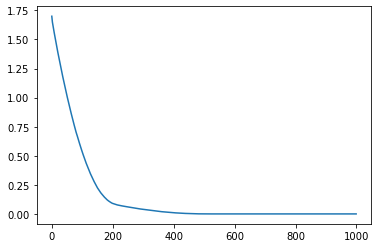

In [39]:
plt.plot(hist.history['loss'])
plt.show()

In [41]:
model.predict([0.01])

array([[0.33776757]], dtype=float32)

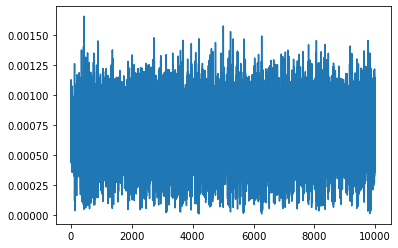

In [45]:
#1만번 학습 이후.
plt.plot(hist.history['mae'])

In [ ]:
# 지금은 더 학습한다고 오차를 획기전으로 줄여주진 않는다. 모델을 더 잘 구성할 것.

In [46]:
model.save('model/after_learning.h5')

## 1.3 노이즈가 있는 데이터로 실습노이즈가 있는 데이터로 실습

In [50]:
# 평균이 0이고 표준편차가 0.1인 데이터 100
np.random.seed(703)
noise=np.array(np.random.normal(0,0.1,100))
noised_scaled_data_F=scaled_data_F+noise

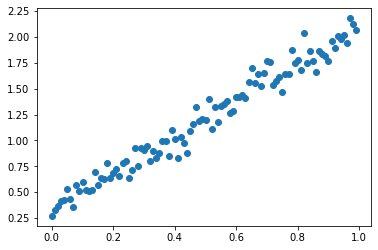

In [52]:
plt.scatter(x=scaled_data_C,y=noised_scaled_data_F)

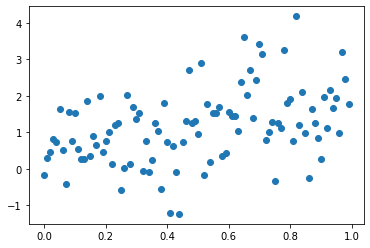

In [53]:
np.random.seed(703)
noise=np.array(np.random.normal(0,1,100))
noised_scaled_data_F2=scaled_data_F+noise
plt.scatter(x=scaled_data_C,y=noised_scaled_data_F2)

In [54]:
# 3. 모델 구성
model2 = Sequential() 
model2.add(Dense(1,input_dim=1))
# 4. 학습과정 설정
model2.compile(loss="mse",optimizer="rmsprop",metrics = ['mae'])
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
# 5. 모델 학습시키기
hist = model2.fit(scaled_data_C,noised_scaled_data_F,epochs=1000,verbose=2) 

Epoch 1/1000
4/4 - 0s - loss: 2.3065 - mae: 1.3855
Epoch 2/1000
4/4 - 0s - loss: 2.2724 - mae: 1.3744
Epoch 3/1000
4/4 - 0s - loss: 2.2470 - mae: 1.3656
Epoch 4/1000
4/4 - 0s - loss: 2.2260 - mae: 1.3586
Epoch 5/1000
4/4 - 0s - loss: 2.2069 - mae: 1.3521
Epoch 6/1000
4/4 - 0s - loss: 2.1892 - mae: 1.3460
Epoch 7/1000
4/4 - 0s - loss: 2.1712 - mae: 1.3399
Epoch 8/1000
4/4 - 0s - loss: 2.1552 - mae: 1.3343
Epoch 9/1000
4/4 - 0s - loss: 2.1376 - mae: 1.3283
Epoch 10/1000
4/4 - 0s - loss: 2.1190 - mae: 1.3218
Epoch 11/1000
4/4 - 0s - loss: 2.1024 - mae: 1.3160
Epoch 12/1000
4/4 - 0s - loss: 2.0867 - mae: 1.3105
Epoch 13/1000
4/4 - 0s - loss: 2.0705 - mae: 1.3048
Epoch 14/1000
4/4 - 0s - loss: 2.0546 - mae: 1.2992
Epoch 15/1000
4/4 - 0s - loss: 2.0379 - mae: 1.2932
Epoch 16/1000
4/4 - 0s - loss: 2.0224 - mae: 1.2877
Epoch 17/1000
4/4 - 0s - loss: 2.0057 - mae: 1.2818
Epoch 18/1000
4/4 - 0s - loss: 1.9899 - mae: 1.2761
Epoch 19/1000
4/4 - 0s - loss: 1.9723 - mae: 1.2698
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 0.4192 - mae: 0.5216
Epoch 159/1000
4/4 - 0s - loss: 0.4126 - mae: 0.5175
Epoch 160/1000
4/4 - 0s - loss: 0.4079 - mae: 0.5143
Epoch 161/1000
4/4 - 0s - loss: 0.4022 - mae: 0.5106
Epoch 162/1000
4/4 - 0s - loss: 0.3963 - mae: 0.5067
Epoch 163/1000
4/4 - 0s - loss: 0.3908 - mae: 0.5031
Epoch 164/1000
4/4 - 0s - loss: 0.3850 - mae: 0.4993
Epoch 165/1000
4/4 - 0s - loss: 0.3798 - mae: 0.4959
Epoch 166/1000
4/4 - 0s - loss: 0.3734 - mae: 0.4915
Epoch 167/1000
4/4 - 0s - loss: 0.3680 - mae: 0.4879
Epoch 168/1000
4/4 - 0s - loss: 0.3630 - mae: 0.4846
Epoch 169/1000
4/4 - 0s - loss: 0.3564 - mae: 0.4802
Epoch 170/1000
4/4 - 0s - loss: 0.3507 - mae: 0.4763
Epoch 171/1000
4/4 - 0s - loss: 0.3447 - mae: 0.4722
Epoch 172/1000
4/4 - 0s - loss: 0.3408 - mae: 0.4696
Epoch 173/1000
4/4 - 0s - loss: 0.3354 - mae: 0.4660
Epoch 174/1000
4/4 - 0s - loss: 0.3303 - mae: 0.4624
Epoch 175/1000
4/4 - 0s - loss: 0.3250 - mae: 0.4590
Epoch 176/1000
4/4 - 0s - loss: 0.3203 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.0900 - mae: 0.2630
Epoch 314/1000
4/4 - 0s - loss: 0.0895 - mae: 0.2622
Epoch 315/1000
4/4 - 0s - loss: 0.0890 - mae: 0.2614
Epoch 316/1000
4/4 - 0s - loss: 0.0885 - mae: 0.2607
Epoch 317/1000
4/4 - 0s - loss: 0.0880 - mae: 0.2601
Epoch 318/1000
4/4 - 0s - loss: 0.0874 - mae: 0.2591
Epoch 319/1000
4/4 - 0s - loss: 0.0868 - mae: 0.2582
Epoch 320/1000
4/4 - 0s - loss: 0.0864 - mae: 0.2577
Epoch 321/1000
4/4 - 0s - loss: 0.0858 - mae: 0.2567
Epoch 322/1000
4/4 - 0s - loss: 0.0853 - mae: 0.2560
Epoch 323/1000
4/4 - 0s - loss: 0.0848 - mae: 0.2553
Epoch 324/1000
4/4 - 0s - loss: 0.0843 - mae: 0.2544
Epoch 325/1000
4/4 - 0s - loss: 0.0838 - mae: 0.2536
Epoch 326/1000
4/4 - 0s - loss: 0.0834 - mae: 0.2529
Epoch 327/1000
4/4 - 0s - loss: 0.0828 - mae: 0.2521
Epoch 328/1000
4/4 - 0s - loss: 0.0822 - mae: 0.2512
Epoch 329/1000
4/4 - 0s - loss: 0.0817 - mae: 0.2503
Epoch 330/1000
4/4 - 0s - loss: 0.0812 - mae: 0.2496
Epoch 331/1000
4/4 - 0s - loss: 0.0805 - mae: 

Epoch 468/1000
4/4 - 0s - loss: 0.0284 - mae: 0.1426
Epoch 469/1000
4/4 - 0s - loss: 0.0281 - mae: 0.1418
Epoch 470/1000
4/4 - 0s - loss: 0.0279 - mae: 0.1412
Epoch 471/1000
4/4 - 0s - loss: 0.0276 - mae: 0.1406
Epoch 472/1000
4/4 - 0s - loss: 0.0274 - mae: 0.1398
Epoch 473/1000
4/4 - 0s - loss: 0.0272 - mae: 0.1392
Epoch 474/1000
4/4 - 0s - loss: 0.0269 - mae: 0.1385
Epoch 475/1000
4/4 - 0s - loss: 0.0267 - mae: 0.1379
Epoch 476/1000
4/4 - 0s - loss: 0.0264 - mae: 0.1370
Epoch 477/1000
4/4 - 0s - loss: 0.0262 - mae: 0.1363
Epoch 478/1000
4/4 - 0s - loss: 0.0259 - mae: 0.1355
Epoch 479/1000
4/4 - 0s - loss: 0.0257 - mae: 0.1348
Epoch 480/1000
4/4 - 0s - loss: 0.0255 - mae: 0.1342
Epoch 481/1000
4/4 - 0s - loss: 0.0253 - mae: 0.1336
Epoch 482/1000
4/4 - 0s - loss: 0.0251 - mae: 0.1329
Epoch 483/1000
4/4 - 0s - loss: 0.0249 - mae: 0.1324
Epoch 484/1000
4/4 - 0s - loss: 0.0247 - mae: 0.1317
Epoch 485/1000
4/4 - 0s - loss: 0.0245 - mae: 0.1310
Epoch 486/1000
4/4 - 0s - loss: 0.0243 - mae: 

Epoch 623/1000
4/4 - 0s - loss: 0.0096 - mae: 0.0761
Epoch 624/1000
4/4 - 0s - loss: 0.0096 - mae: 0.0760
Epoch 625/1000
4/4 - 0s - loss: 0.0096 - mae: 0.0758
Epoch 626/1000
4/4 - 0s - loss: 0.0095 - mae: 0.0757
Epoch 627/1000
4/4 - 0s - loss: 0.0095 - mae: 0.0756
Epoch 628/1000
4/4 - 0s - loss: 0.0095 - mae: 0.0755
Epoch 629/1000
4/4 - 0s - loss: 0.0095 - mae: 0.0756
Epoch 630/1000
4/4 - 0s - loss: 0.0095 - mae: 0.0755
Epoch 631/1000
4/4 - 0s - loss: 0.0094 - mae: 0.0752
Epoch 632/1000
4/4 - 0s - loss: 0.0094 - mae: 0.0752
Epoch 633/1000
4/4 - 0s - loss: 0.0094 - mae: 0.0750
Epoch 634/1000
4/4 - 0s - loss: 0.0094 - mae: 0.0749
Epoch 635/1000
4/4 - 0s - loss: 0.0093 - mae: 0.0748
Epoch 636/1000
4/4 - 0s - loss: 0.0093 - mae: 0.0746
Epoch 637/1000
4/4 - 0s - loss: 0.0093 - mae: 0.0747
Epoch 638/1000
4/4 - 0s - loss: 0.0093 - mae: 0.0745
Epoch 639/1000
4/4 - 0s - loss: 0.0093 - mae: 0.0745
Epoch 640/1000
4/4 - 0s - loss: 0.0092 - mae: 0.0743
Epoch 641/1000
4/4 - 0s - loss: 0.0092 - mae: 

Epoch 778/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 779/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 780/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 781/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0710
Epoch 782/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 783/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 784/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 785/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 786/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0706
Epoch 787/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0706
Epoch 788/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0706
Epoch 789/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 790/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 791/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 792/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 793/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 794/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 795/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0706
Epoch 796/1000
4/4 - 0s - loss: 0.0086 - mae: 

Epoch 933/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 934/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 935/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 936/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 937/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0706
Epoch 938/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 939/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 940/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 941/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 942/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 943/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 944/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 945/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 946/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 947/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 948/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 949/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 950/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 951/1000
4/4 - 0s - loss: 0.0086 - mae: 

In [57]:
print(model2.predict(np.array([0.01])))

[[0.3538321]]


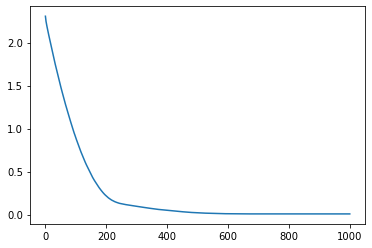

In [58]:
plt.plot(hist.history['loss'])
plt.show()

In [59]:
model2.save(,'model/noise-after_learning.h5 ㅇ ㅏ
            ')